<a href="https://colab.research.google.com/github/TamaVux/PdM/blob/CMAPSS_instance_ver0/CMAPSS/CMAPSS_instance_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#For model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [188]:
plt.style.use('classic')
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5

In [2]:
# For EDA
!pip install ydata-profiling
import ydata_profiling as pdpf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e2be742bdbd970de51b72bff69a73eb25d45986fe413cf65e4cd244295703ffd
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


## Some support functions

In [3]:
# Split dataframe into X (feature) and Y (target)
def split_df_XY(df,feature_list,target_list):
  X = df[feature_list].copy()
  Y = df[target_list].copy()
  return X,Y
# Split dataframe into group value (from a column); Ex split CMAPSS contain 100 unit into 100 set of data
  # Dataset with be save as df[] , with each value in [] is the name value
def split_df_unit(df,colname):
  df_unit = {}
  df_group = df.groupby(colname)
  for name, group in df_group:
    df_unit[name] = group.copy().reset_index(drop=True)
  return df_unit

# FOLDER PATHS

In [4]:
if not os.path.exists('/content/drive'):
  try:
    from google.colab import drive
    drive.mount('/content/drive')
  except:
    print('Cant mount')
else:
  print('Mounted')

Mounted at /content/drive


In [5]:
DRIVE_PATHS = '/content/drive/MyDrive/ColabProjects'
PROJECT_NAME = 'PdM'
DRIVE_FOLDERS = {
    'DATASET': os.path.join(DRIVE_PATHS,PROJECT_NAME,'dataset'),
    'MODEL': os.path.join(DRIVE_PATHS,PROJECT_NAME,'model'),
    'CMAPSS': os.path.join(DRIVE_PATHS,PROJECT_NAME,'dataset','CMAPSS'),
    'RESULTS': os.path.join(DRIVE_PATHS,PROJECT_NAME,'results')
}

Project tag:
contain:
* Save file

In [6]:
CMAPSS_IN = {
    'SAVE_MODEL': os.path.join(DRIVE_FOLDERS['MODEL'],'CMAPSS_instance'),
    'SAVE_RESULTS': os.path.join(DRIVE_FOLDERS['RESULTS'],'CMAPSS_instance'),
}

In [7]:
for path in DRIVE_FOLDERS.values() :
    if not os.path.exists(path):
        if os.name == 'posix':
          print('create: {}'.format(path))
          !mkdir -p {path}
        if os.name == 'nt':
          print('create: {}'.format(path))
          !mkdir {path}

for path in CMAPSS_IN.values() :

    if not os.path.exists(path):
        if os.name == 'posix':
          print('create: {}'.format(path))
          !mkdir -p {path}
        if os.name == 'nt':
          print('create: {}'.format(path))
          !mkdir {path}

## Global varibles

In [182]:
GLOBALVALUE = {
    # RULMODE: choose between 'HI', 'RUL', 'MAX' -> will format the output in section 'Create HI in dataset'
    'RULMODE' : 'RUL',

}

# IMPORT DATA


## Add header add choose dataset

In [9]:
# Add header
header = ['unit_nr','cycles','setting_1','setting_2','setting_3']
ss_list = []
for i in range(1,22):
  ss = 'ss{}'.format(i)
  ss_list.append(ss)
header = header + ss_list
print(header)

['unit_nr', 'cycles', 'setting_1', 'setting_2', 'setting_3', 'ss1', 'ss2', 'ss3', 'ss4', 'ss5', 'ss6', 'ss7', 'ss8', 'ss9', 'ss10', 'ss11', 'ss12', 'ss13', 'ss14', 'ss15', 'ss16', 'ss17', 'ss18', 'ss19', 'ss20', 'ss21']


In [10]:
#Dataset list
dataset_list = glob.glob(os.path.join(DRIVE_FOLDERS['CMAPSS'],'*.txt')) #- set(glob.glob(os.path.join(DRIVE_FOLDERS['CMAPSS'],'RUL*')))
print(*dataset_list, sep='\n')

/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/train_FD001.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/test_FD001.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/train_FD003.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/test_FD003.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/train_FD002.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/test_FD002.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/train_FD004.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/test_FD004.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/RUL_FD001.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/RUL_FD002.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/RUL_FD004.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/RUL_FD003.txt
/content/drive/MyDrive/ColabProjects/PdM/dataset/CMAPSS/readme.txt


CHOOSING DATASET

In [11]:
#Choose dataset
train_dataset = os.path.join(DRIVE_FOLDERS['CMAPSS'],'train_FD001.txt')
# test_dataset = os.path.join(DRIVE_FOLDERS['CMAPSS'],'test_FD001.txt')
# rul_dataset = os.path.join(DRIVE_FOLDERS['CMAPSS'],'RUL_FD001.txt')
# Pandas dataframe
df_FD001 = pd.read_csv(train_dataset,header=None,delim_whitespace=True,names=header)
# df_test = pd.read_csv(test_dataset,header=None,delim_whitespace=True,names=header)
# df_rul = pd.read_csv(rul_dataset,header=None,delim_whitespace=True,names=['rul'])

# PRE-PROCESS

## Preview Naked data

The data consist of 100 units of engines, each unit R2F therefor have each unique RUL.

In [12]:
def mine_naked_preview(df):
  print('\n'.join([
        f'---   Describe: \n{df.describe()}',
        f'---   Null value:\n{df.isnull().sum()}',
        f'---   Unique value:\n{df_FD001.nunique()}',
        ]))

In [13]:
mine_naked_preview(df_FD001)

---   Describe: 
            unit_nr        cycles     setting_1     setting_2  setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000    20631.0   
mean      51.506568    108.807862     -0.000009      0.000002      100.0   
std       29.227633     68.880990      0.002187      0.000293        0.0   
min        1.000000      1.000000     -0.008700     -0.000600      100.0   
25%       26.000000     52.000000     -0.001500     -0.000200      100.0   
50%       52.000000    104.000000      0.000000      0.000000      100.0   
75%       77.000000    156.000000      0.001500      0.000300      100.0   
max      100.000000    362.000000      0.008700      0.000600      100.0   

            ss1           ss2           ss3           ss4           ss5  ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      9.000605 

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

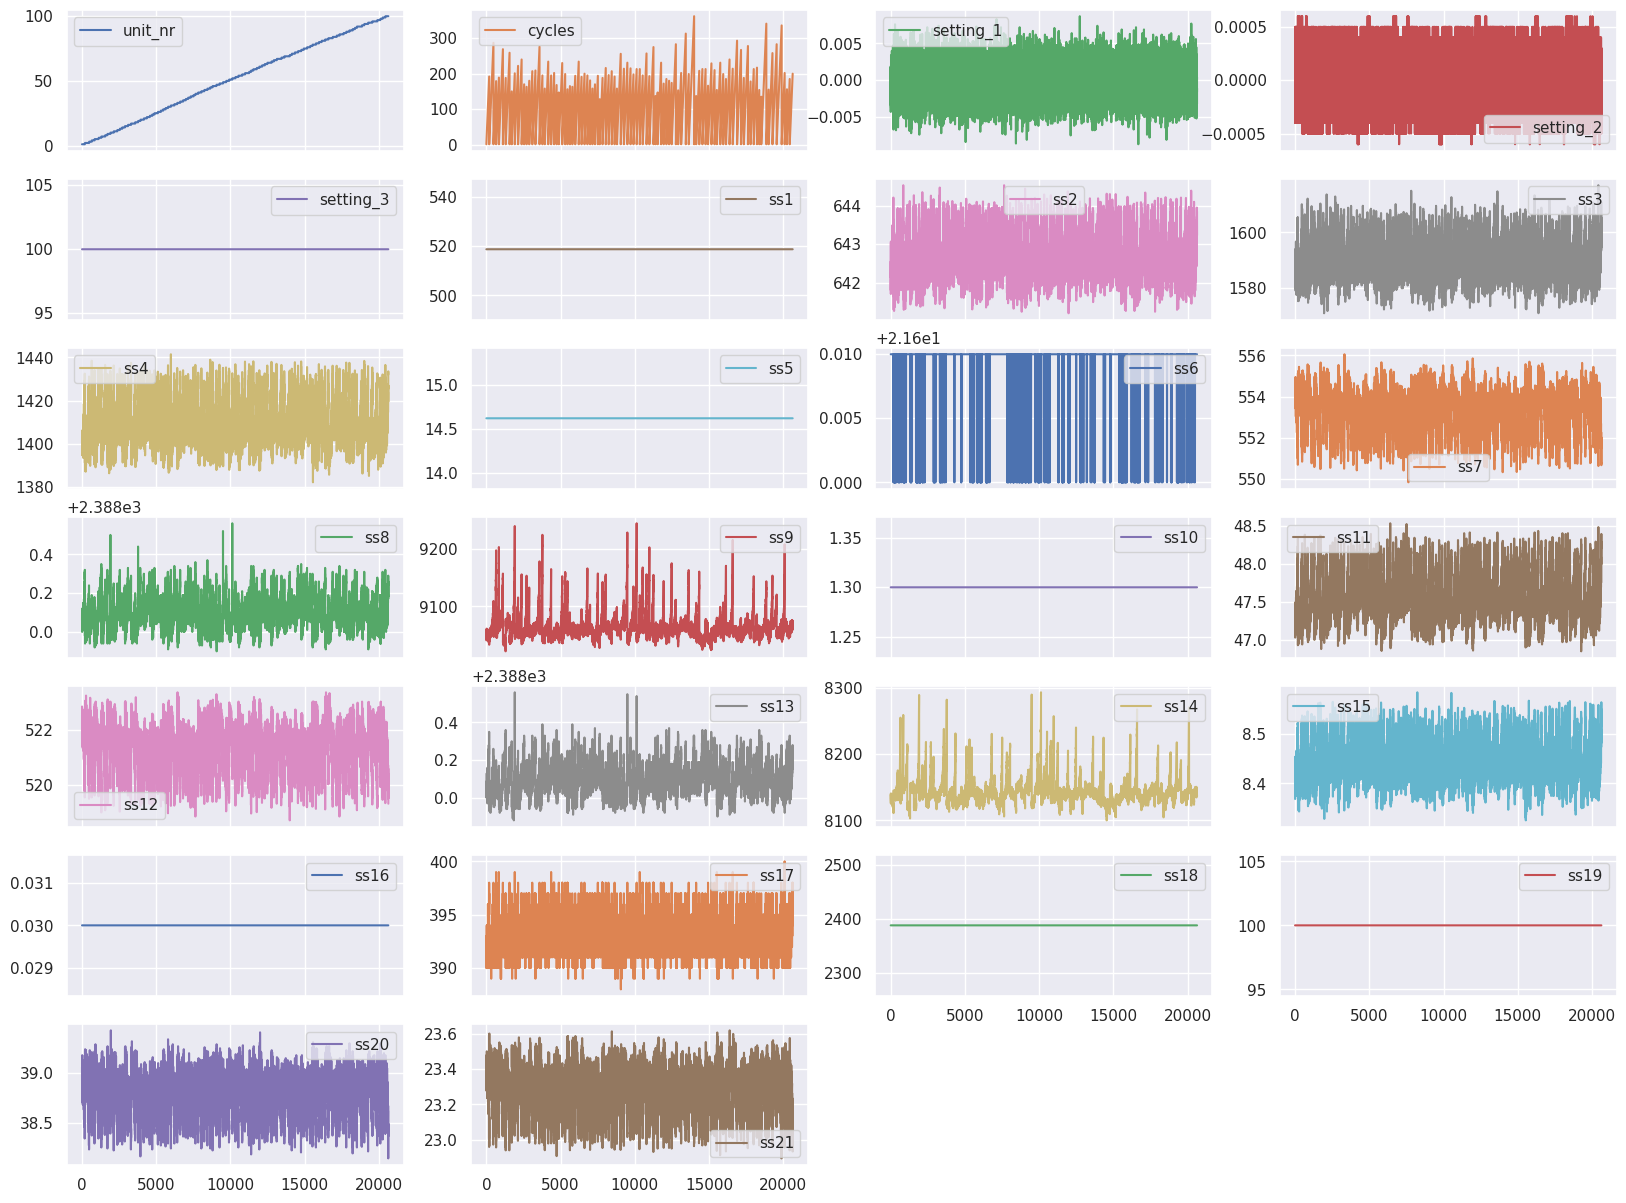

In [14]:
df_FD001.plot(subplots = True,layout=(7,4),figsize=(20,15))

Plot all values for each units, use the same cycles scales

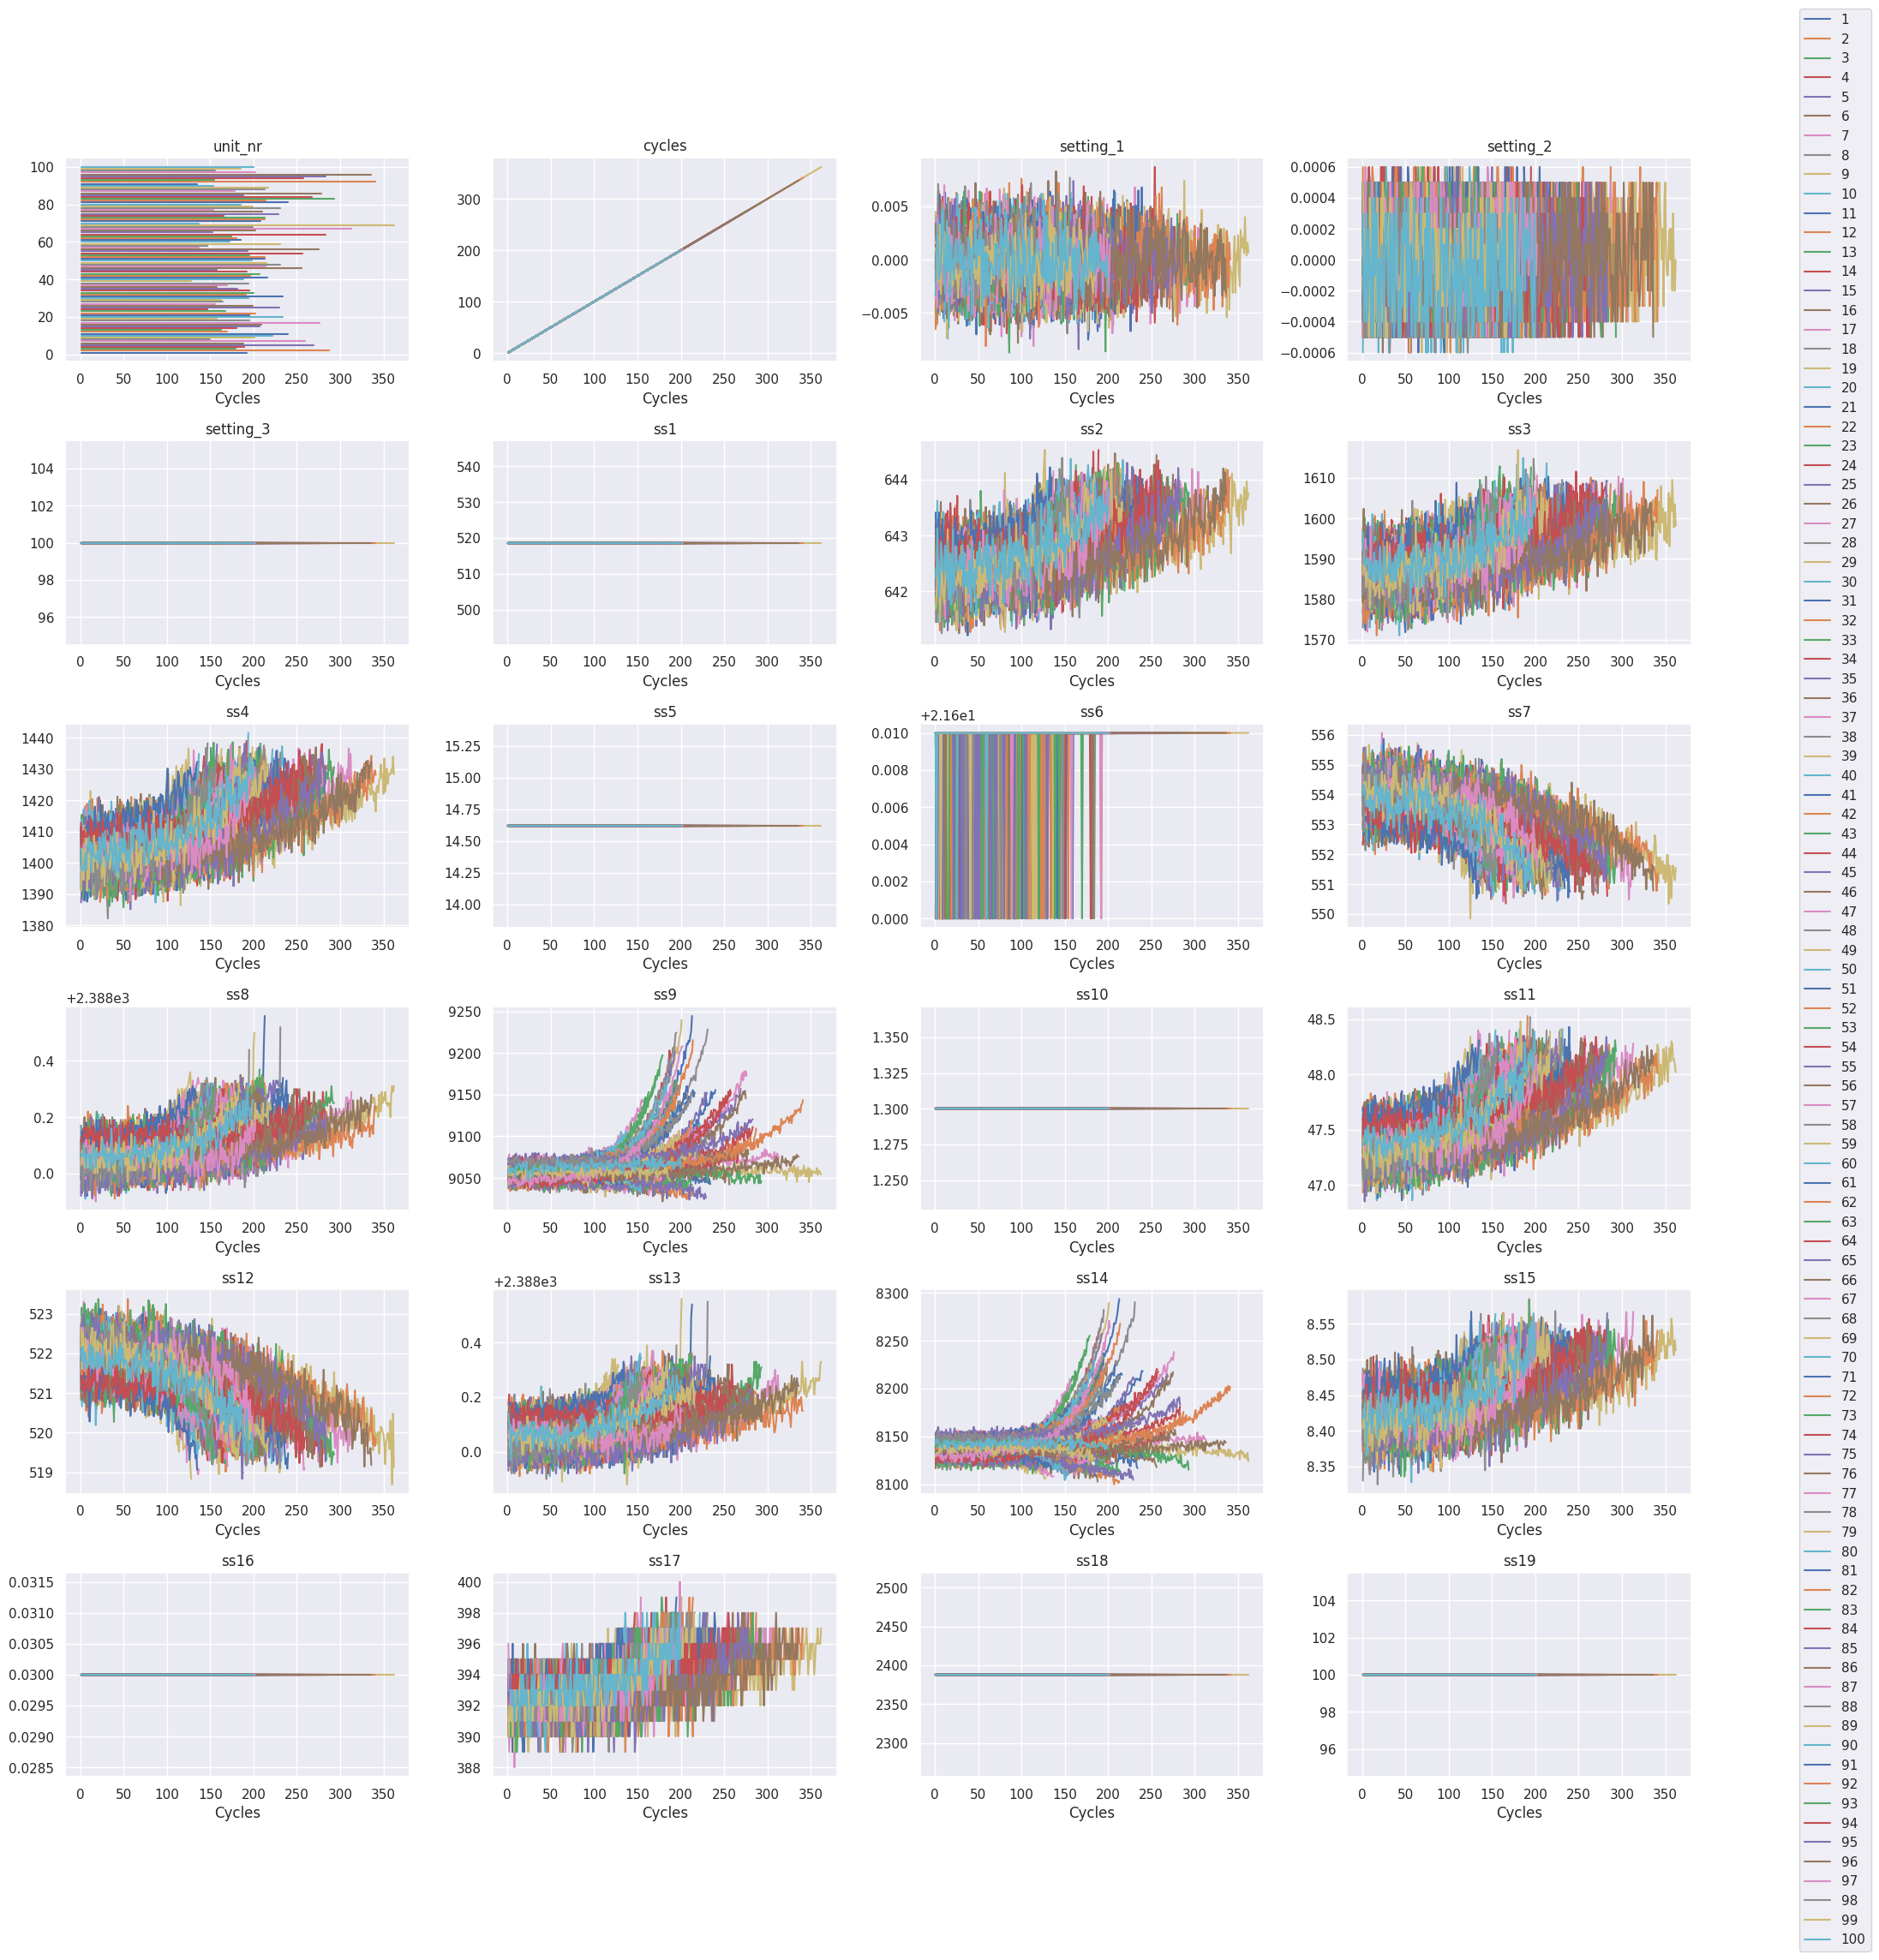

In [15]:
fig, axes = plt.subplots(6,4,figsize = (20,20))
axes = axes.flatten()
for i, (column, ax) in enumerate(zip(df_FD001.columns, axes)):
  for i in df_FD001['unit_nr'].unique():
    ax.plot('cycles',column,data=df_FD001[df_FD001['unit_nr'] == i])
    ax.set_title(column)
    ax.set_xlabel('Cycles')

# Remove any unused subplots
if len(df_FD001.columns) < len(axes):
    for ax in axes[len(df_FD001.columns):]:
        ax.remove()

# Get the handles and labels from all subplots - all subplot have the same legend
handles,labels = axes[0].get_legend_handles_labels()

# Create a common legend outside of the subplots
fig.legend(handles, df_FD001['unit_nr'].unique().tolist(), loc='center left', bbox_to_anchor=(1.05, 0.5))

fig.tight_layout()
plt.show()

In [16]:
# df_profile = pdpf.ProfileReport(df_FD001, dark_mode=True)
# df_profile

### Drop, Rename, Add ?

In [17]:
# Remove setting collunms
df_FD001 = df_FD001.drop(['setting_1','setting_2','setting_3'],axis = 1)

### Create HI in dataset !!!

Check plot histogram of RUL. From 100 engine !

How The RUL is distribute

Most engine have 200 Max cycle

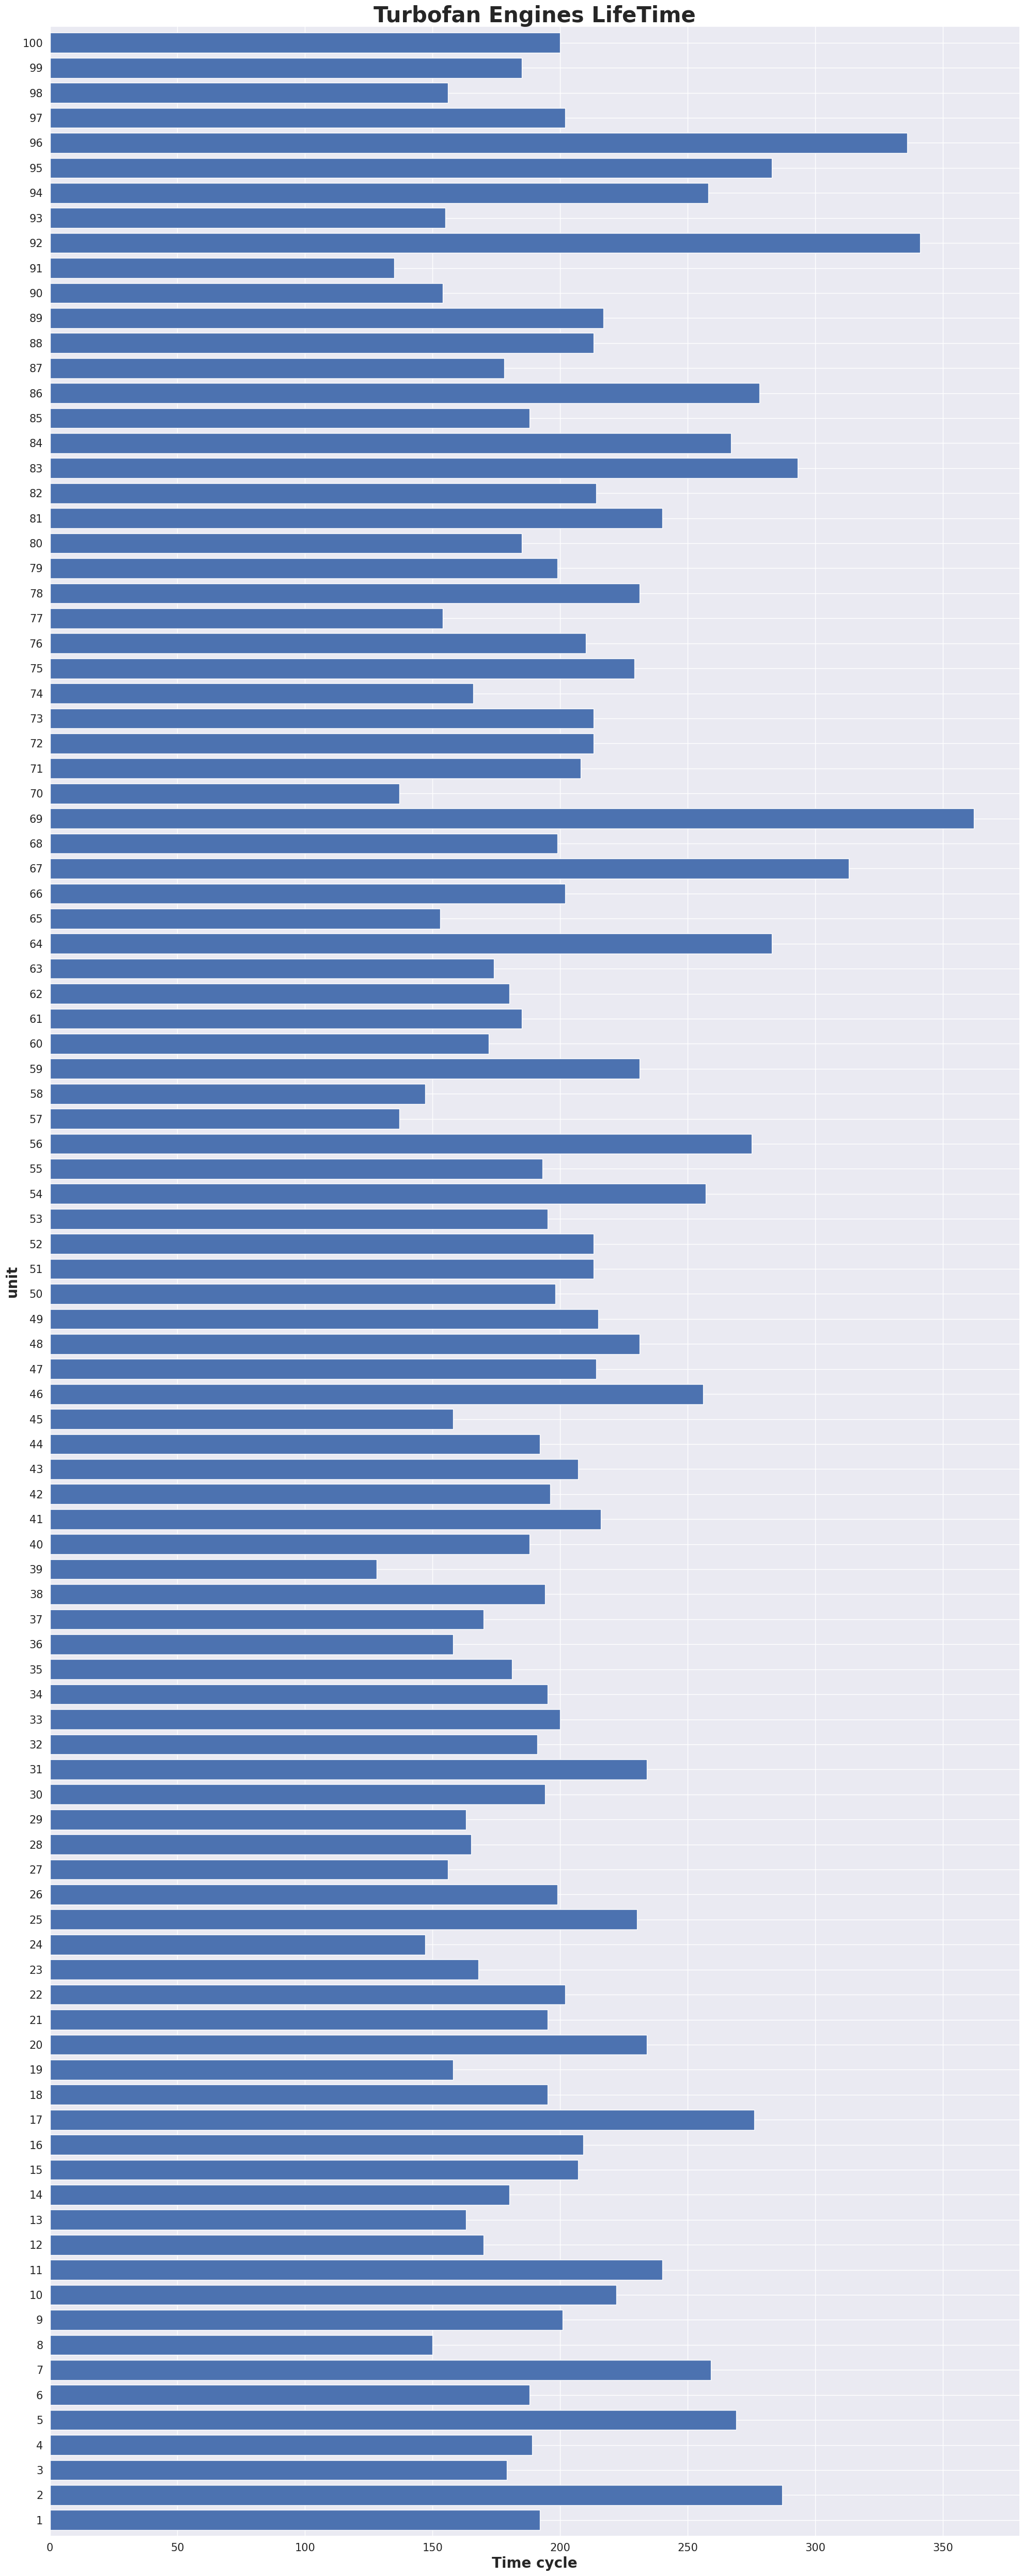

In [18]:
max_time_cycles=df_FD001[['unit_nr','cycles']].groupby('unit_nr').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 12.444444444444452, 'max time cycle')

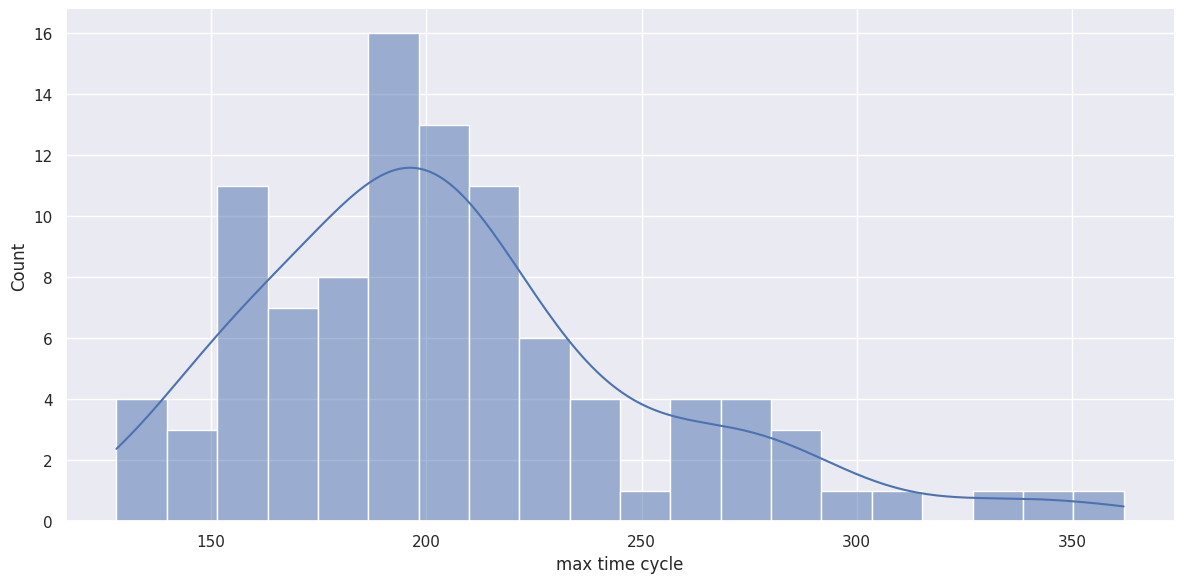

In [19]:
#Distribution of maximum time cycles
sns.displot(max_time_cycles['cycles'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')

In [183]:
# Calculate RUL. Each engine have n-cycles. Calculate max cycle to get RUL of each engine (max - current)cycle
def add_rul(df,mode = 'HI'):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    MAX = grouped_by_unit["cycles"].max()

    # Merge the max cycle back into the original frame
    result_frame = df.merge(MAX.to_frame(name='MAX'), left_on='unit_nr', right_index=True)

    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["MAX"] - result_frame["cycles"]
    result_frame["RUL"] = remaining_useful_life
    # Add HI
    result_frame['HI'] = (remaining_useful_life / result_frame['MAX']) * 100

    # drop MAX as it's no longer needed
    if mode == 'HI':
      result_frame = result_frame.drop(["MAX",'RUL'], axis=1)
    elif mode == 'RUL':
      result_frame = result_frame.drop(["MAX",'HI'], axis=1)
    elif mode == 'MAX':
      result_frame = result_frame.drop(["RUL",'HI'], axis=1)
    return result_frame

# The mode is define in global varible, in 'FOLDER PATHS'
df_HI = add_rul(df_FD001,mode = GLOBALVALUE['RULMODE'])
df_HI.head(15)

unit_nr  cycles     ss1     ss2      ss3      ss4    ss5    ss6     ss7  \
0         1       1  518.67  641.82  1589.70  1400.60  14.62  21.61  554.36   
1         1       2  518.67  642.15  1591.82  1403.14  14.62  21.61  553.75   
2         1       3  518.67  642.35  1587.99  1404.20  14.62  21.61  554.26   
3         1       4  518.67  642.35  1582.79  1401.87  14.62  21.61  554.45   
4         1       5  518.67  642.37  1582.85  1406.22  14.62  21.61  554.00   
5         1       6  518.67  642.10  1584.47  1398.37  14.62  21.61  554.67   
6         1       7  518.67  642.48  1592.32  1397.77  14.62  21.61  554.34   
7         1       8  518.67  642.56  1582.96  1400.97  14.62  21.61  553.85   
8         1       9  518.67  642.12  1590.98  1394.80  14.62  21.61  553.69   
9         1      10  518.67  641.71  1591.24  1400.46  14.62  21.61  553.59   
10        1      11  518.67  642.28  1581.75  1400.64  14.62  21.61  554.54   
11        1      12  518.67  642.06  1583.41  1400.15  14.62  21.61  554.52   
12        1      13  518.67  643.07  1582.19  1400.83  14.62  21.61  553.44   
13        1      14  518.67  642.35  1592.95  1399.16  14.62  21.61  554.48   
14        1      15  518.67  642.43  1583.82  1402.13  14.62  21.61  553.64   

        ss8  ...     ss13     ss14    ss15  ss16  ss17  ss18   ss19   ss20  \
0   2388.06  ...  2388.02  8138.62  8.4195  0.03   392  2388  100.0  39.06   
1   2388.04  ...  2388.07  8131.49  8.4318  0.03   392  2388  100.0  39.00   
2   2388.08  ...  2388.03  8133.23  8.4178  0.03   390  2388  100.0  38.95   
3   2388.11  ...  2388.08  8133.83  8.3682  0.03   392  2388  100.0  38.88   
4   2388.06  ...  2388.04  8133.80  8.4294  0.03   393  2388  100.0  38.90   
5   2388.02  ...  2388.03  8132.85  8.4108  0.03   391  2388  100.0  38.98   
6   2388.02  ...  2388.03  8132.32  8.3974  0.03   392  2388  100.0  39.10   
7   2388.00  ...  2388.03  8131.07  8.4076  0.03   391  2388  100.0  38.97   
8   2388.05  ...  2388.05  8125.69  8.3728  0.03   392  2388  100.0  39.05   
9   2388.05  ...  2388.06  8129.38  8.4286  0.03   393  2388  100.0  38.95   
10  2388.05  ...  2388.01  8140.58  8.4340  0.03   392  2388  100.0  38.94   
11  2388.09  ...  2388.02  8134.25  8.3938  0.03   391  2388  100.0  39.06   
12  2388.12  ...  2388.08  8128.10  8.4152  0.03   393  2388  100.0  38.93   
13  2388.09  ...  2388.00  8134.43  8.3964  0.03   393  2388  100.0  39.18   
14  2388.11  ...  2388.08  8127.56  8.4199  0.03   391  2388  100.0  38.99   

       ss21  RUL  
0   23.4190  191  
1   23.4236  190  
2   23.3442  189  
3   23.3739  188  
4   23.4044  187  
5   23.3669  186  
6   23.3774  185  
7   23.3106  184  
8   23.4066  183  
9   23.4694  182  
10  23.4787  181  
11  23.3660  180  
12  23.2757  179  
13  23.3826  178  
14  23.3500  177  

[15 rows x 24 columns]

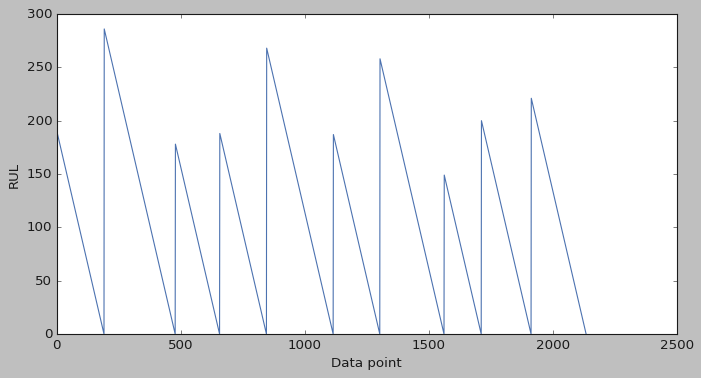

In [190]:
plt.style.use('classic')
df_HI[df_HI['unit_nr'] < 11]['RUL'].plot(figsize = (10,5))
plt.ylabel('RUL')
plt.xlabel('Data point')
plt.savefig('HI_linear.png', bbox_inches='tight')

### Optional: convert to non-linear

The above section create HI directly from RUL, which assuming the relationship betwwen HI-RUL is linear. We can change it so that it follow a non-linear degradation format. Beacause the input data `ss{}` is a non-linear value and it show a degradation from, so try to predict a non-linear to a linear form is hard (Run check model on linear HI if doubt).

=> convert it to a non-linear forms

The non-linear form used:
\begin{align}
&HI(t) = a×e^{b×t} + c\ \text{for}\ HI \in (0\%,100\%)
\end{align}


The function alternate form:
\begin{align}
& HI(t) = (HI_{begin} - c) × [\frac{HI_{end}-c}{HI_{begin}-c}]^{t/T} + c
\end{align}
with $T$ is the MAX cycles and $c \notin(0,1) $

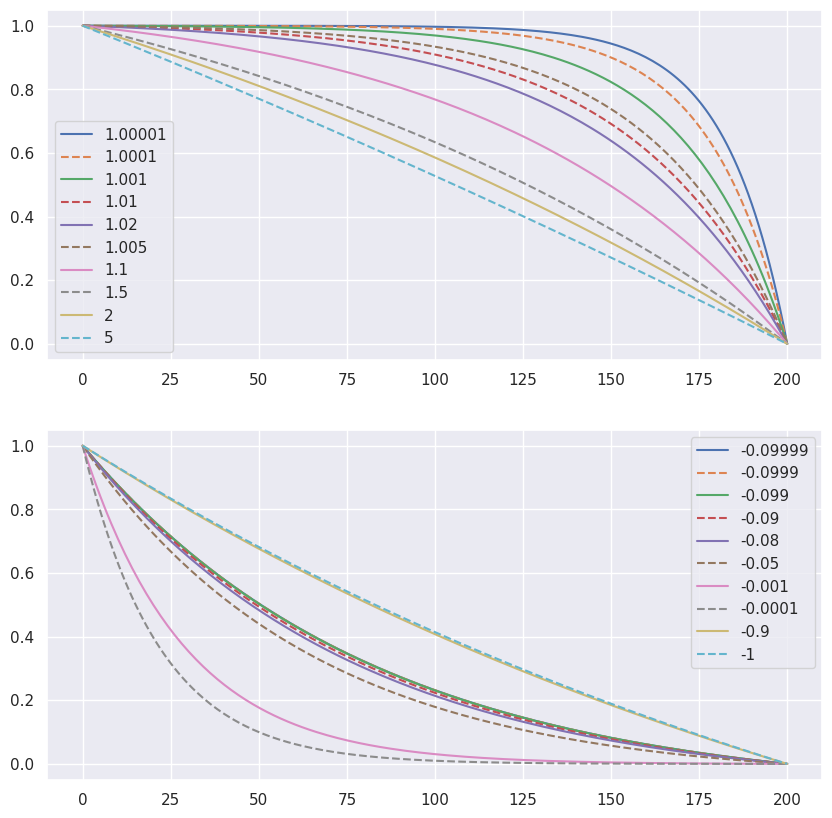

In [21]:
# Show how such function run with each c
fig ,(ax1,ax2) = plt.subplots(2,1,figsize=(10,10))

T=200
t = np.linspace(0,200,200)
c_up = [1.00001, 1.0001, 1.001, 1.01, 1.02, 1.005, 1.1, 1.5, 2, 5  ]
c_down = [-0.09999, -0.09990, -0.09900, -0.09000, -0.08, -0.05, -0.001, -0.0001,-0.9, -1]
for i in range(0,10):
  linestyle = '-' if i % 2 == 0 else '--'

  HI_up = (1 - c_up[i]) * ((0-c_up[i])/(1-c_up[i]))**(t/T) + c_up[i]
  ax1.plot(t,HI_up,linestyle=linestyle, label = '{}'.format(c_up[i]))

  HI_down = (1 - c_down[i]) * ((0 - c_down[i])/(1 - c_down[i]))**(t/T) + c_down[i]

  ax2.plot(t,HI_down, linestyle=linestyle, label = '{}'.format(c_down[i]))

  ax1.legend()
  ax2.legend()

In [22]:
def add_nonL_HI(df,c = 1.02):
  # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    MAX = grouped_by_unit["cycles"].max()

    # Merge the max cycle back into the original frame
    result_frame = df.merge(MAX.to_frame(name='MAX'), left_on='unit_nr', right_index=True)

    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["MAX"] - result_frame["cycles"]
    result_frame["RUL"] = remaining_useful_life
    # Add HI
    result_frame['HI'] = (1 - c) * ((0-c)/(1-c))**((result_frame["cycles"])/ result_frame["MAX"]) + c

    # Set global value to 'HI
    GLOBALVALUE['RULMODE'] = 'HI'

    # Drop MAX and RUL
    result_frame= result_frame.drop(['RUL','MAX'],axis=1)
    return result_frame

In [23]:
df_HI = add_nonL_HI(df_FD001)
df_HI

unit_nr  cycles     ss1     ss2      ss3      ss4    ss5    ss6  \
0            1       1  518.67  641.82  1589.70  1400.60  14.62  21.61   
1            1       2  518.67  642.15  1591.82  1403.14  14.62  21.61   
2            1       3  518.67  642.35  1587.99  1404.20  14.62  21.61   
3            1       4  518.67  642.35  1582.79  1401.87  14.62  21.61   
4            1       5  518.67  642.37  1582.85  1406.22  14.62  21.61   
...        ...     ...     ...     ...      ...      ...    ...    ...   
20626      100     196  518.67  643.49  1597.98  1428.63  14.62  21.61   
20627      100     197  518.67  643.54  1604.50  1433.58  14.62  21.61   
20628      100     198  518.67  643.42  1602.46  1428.18  14.62  21.61   
20629      100     199  518.67  643.23  1605.26  1426.53  14.62  21.61   
20630      100     200  518.67  643.85  1600.38  1432.14  14.62  21.61   

          ss7      ss8  ...     ss13     ss14    ss15  ss16  ss17  ss18  \
0      554.36  2388.06  ...  2388.02  8138.62  8.4195  0.03   392  2388   
1      553.75  2388.04  ...  2388.07  8131.49  8.4318  0.03   392  2388   
2      554.26  2388.08  ...  2388.03  8133.23  8.4178  0.03   390  2388   
3      554.45  2388.11  ...  2388.08  8133.83  8.3682  0.03   392  2388   
4      554.00  2388.06  ...  2388.04  8133.80  8.4294  0.03   393  2388   
...       ...      ...  ...      ...      ...     ...   ...   ...   ...   
20626  551.43  2388.19  ...  2388.26  8137.60  8.4956  0.03   397  2388   
20627  550.86  2388.23  ...  2388.22  8136.50  8.5139  0.03   395  2388   
20628  550.94  2388.24  ...  2388.24  8141.05  8.5646  0.03   398  2388   
20629  550.68  2388.25  ...  2388.23  8139.29  8.5389  0.03   395  2388   
20630  550.79  2388.26  ...  2388.26  8137.33  8.5036  0.03   396  2388   

        ss19   ss20     ss21        HI  
0      100.0  39.06  23.4190  0.999586  
1      100.0  39.00  23.4236  0.999164  
2      100.0  38.95  23.3442  0.998733  
3      100.0  38.88  23.3739  0.998293  
4      100.0  38.90  23.4044  0.997844  
...      ...    ...      ...       ...  
20626  100.0  38.49  22.9735  0.077137  
20627  100.0  38.30  23.1594  0.058417  
20628  100.0  38.44  22.9333  0.039326  
20629  100.0  38.29  23.0640  0.019856  
20630  100.0  38.37  23.0522  0.000000  

[20631 rows x 24 columns]

# FEATURE ENGINERING AND SELECTION

## Correlation


Drop the cycles columns since it now turn into HI

In [24]:
try:
  df_HI = df_HI.drop('cycles',axis=1)
except:
  print('Already drop')

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
def showheatmap(df,threshold=None):
  if threshold == None:
    # Calculate the correlation matrix
    corr_matrix = df.corr(method = 'pearson').abs()

    # Create a heatmap using seaborn
    plt.figure(figsize=(20,10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    return corr_matrix
  else:
    corr_matrix = df.corr(method = 'pearson').abs()
    bool_matrix = corr_matrix.abs() >= threshold
    # Create a heatmap using seaborn
    plt.figure(figsize=(20,10))
    sns.heatmap(bool_matrix, annot=True, cmap='coolwarm')
    return bool_matrix

The dataset contain 100 units, however we will run on the whole dataset and consider all 100 units is the same !!!

Make dataset with important features

In [26]:
df_HI = df_HI.drop('unit_nr',axis=1)

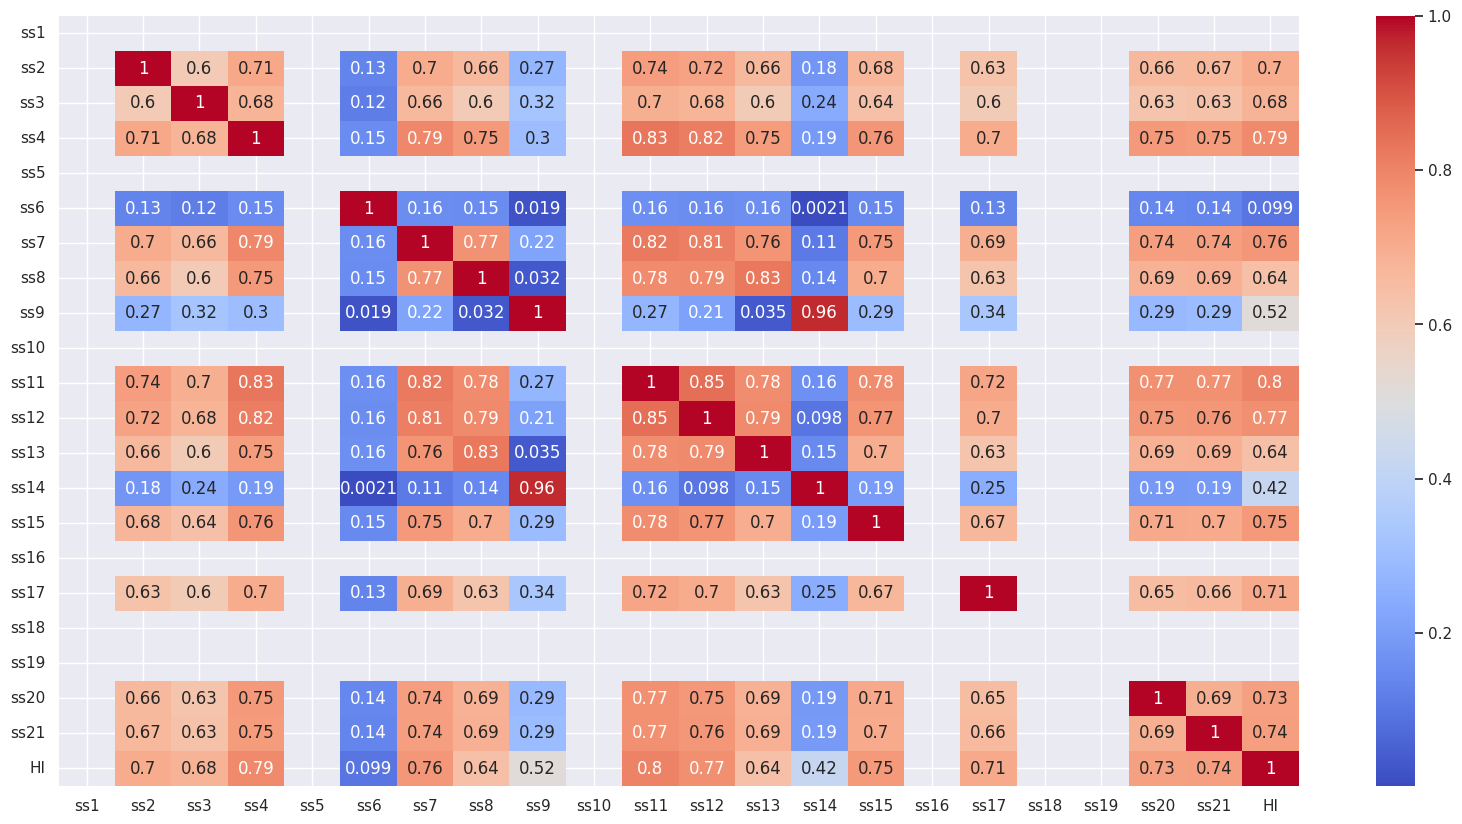

In [27]:
corr_matrix = showheatmap(df_HI)

In [28]:
def mine_corr_filter(df,target_col,threshold):
  # target column for filter
  cor_target = corr_matrix[GLOBALVALUE['RULMODE']]
  relevant_features = cor_target[cor_target > filter_threshold]
  print(relevant_features)
  # keep the features
  df_corr = df.loc[:, relevant_features.index.tolist()]
  return df_corr

In [29]:
# With threshold, we will eliminate unrelevant data
filter_threshold = 0.65
df_corr =  mine_corr_filter(df = df_HI,
                 target_col= GLOBALVALUE['RULMODE'],
                 threshold =filter_threshold )
df_corr

ss2     0.701776
ss3     0.683324
ss4     0.785866
ss7     0.757591
ss11    0.803442
ss12    0.774936
ss15    0.747776
ss17    0.708747
ss20    0.731308
ss21    0.735332
HI      1.000000
Name: HI, dtype: float64


ss2      ss3      ss4     ss7   ss11    ss12    ss15  ss17   ss20  \
0      641.82  1589.70  1400.60  554.36  47.47  521.66  8.4195   392  39.06   
1      642.15  1591.82  1403.14  553.75  47.49  522.28  8.4318   392  39.00   
2      642.35  1587.99  1404.20  554.26  47.27  522.42  8.4178   390  38.95   
3      642.35  1582.79  1401.87  554.45  47.13  522.86  8.3682   392  38.88   
4      642.37  1582.85  1406.22  554.00  47.28  522.19  8.4294   393  38.90   
...       ...      ...      ...     ...    ...     ...     ...   ...    ...   
20626  643.49  1597.98  1428.63  551.43  48.07  519.49  8.4956   397  38.49   
20627  643.54  1604.50  1433.58  550.86  48.04  519.68  8.5139   395  38.30   
20628  643.42  1602.46  1428.18  550.94  48.09  520.01  8.5646   398  38.44   
20629  643.23  1605.26  1426.53  550.68  48.39  519.67  8.5389   395  38.29   
20630  643.85  1600.38  1432.14  550.79  48.20  519.30  8.5036   396  38.37   

          ss21        HI  
0      23.4190  0.999586  
1      23.4236  0.999164  
2      23.3442  0.998733  
3      23.3739  0.998293  
4      23.4044  0.997844  
...        ...       ...  
20626  22.9735  0.077137  
20627  23.1594  0.058417  
20628  22.9333  0.039326  
20629  23.0640  0.019856  
20630  23.0522  0.000000  

[20631 rows x 11 columns]

## Simple drop

See weird datas == drop it !!

In [191]:
df_HI

unit_nr  cycles     ss1     ss2      ss3      ss4    ss5    ss6  \
0            1       1  518.67  641.82  1589.70  1400.60  14.62  21.61   
1            1       2  518.67  642.15  1591.82  1403.14  14.62  21.61   
2            1       3  518.67  642.35  1587.99  1404.20  14.62  21.61   
3            1       4  518.67  642.35  1582.79  1401.87  14.62  21.61   
4            1       5  518.67  642.37  1582.85  1406.22  14.62  21.61   
...        ...     ...     ...     ...      ...      ...    ...    ...   
20626      100     196  518.67  643.49  1597.98  1428.63  14.62  21.61   
20627      100     197  518.67  643.54  1604.50  1433.58  14.62  21.61   
20628      100     198  518.67  643.42  1602.46  1428.18  14.62  21.61   
20629      100     199  518.67  643.23  1605.26  1426.53  14.62  21.61   
20630      100     200  518.67  643.85  1600.38  1432.14  14.62  21.61   

          ss7      ss8  ...     ss13     ss14    ss15  ss16  ss17  ss18  \
0      554.36  2388.06  ...  2388.02  8138.62  8.4195  0.03   392  2388   
1      553.75  2388.04  ...  2388.07  8131.49  8.4318  0.03   392  2388   
2      554.26  2388.08  ...  2388.03  8133.23  8.4178  0.03   390  2388   
3      554.45  2388.11  ...  2388.08  8133.83  8.3682  0.03   392  2388   
4      554.00  2388.06  ...  2388.04  8133.80  8.4294  0.03   393  2388   
...       ...      ...  ...      ...      ...     ...   ...   ...   ...   
20626  551.43  2388.19  ...  2388.26  8137.60  8.4956  0.03   397  2388   
20627  550.86  2388.23  ...  2388.22  8136.50  8.5139  0.03   395  2388   
20628  550.94  2388.24  ...  2388.24  8141.05  8.5646  0.03   398  2388   
20629  550.68  2388.25  ...  2388.23  8139.29  8.5389  0.03   395  2388   
20630  550.79  2388.26  ...  2388.26  8137.33  8.5036  0.03   396  2388   

        ss19   ss20     ss21  RUL  
0      100.0  39.06  23.4190  191  
1      100.0  39.00  23.4236  190  
2      100.0  38.95  23.3442  189  
3      100.0  38.88  23.3739  188  
4      100.0  38.90  23.4044  187  
...      ...    ...      ...  ...  
20626  100.0  38.49  22.9735    4  
20627  100.0  38.30  23.1594    3  
20628  100.0  38.44  22.9333    2  
20629  100.0  38.29  23.0640    1  
20630  100.0  38.37  23.0522    0  

[20631 rows x 24 columns]

From above plot, we can drop: ss19, ss18, ss16, ss10, ss5, ss1, ss6

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

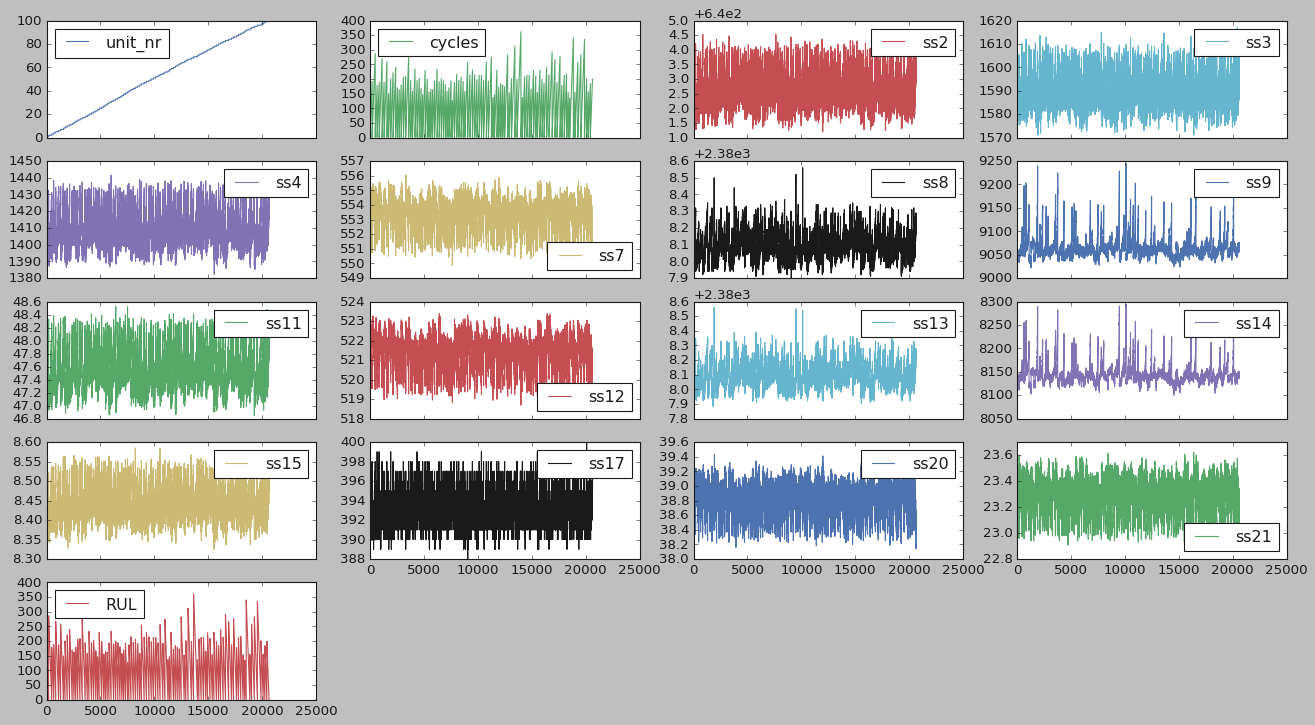

In [192]:
df_drop = df_HI.drop(['ss19', 'ss18', 'ss16', 'ss10', 'ss5', 'ss1', 'ss6'],axis=1)
df_drop.plot(subplots = True,layout=(7,4),figsize=(20,15))

## Normalize

In [534]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import pandas as pd

def min_max_scaler(df):
  scaler = MinMaxScaler()
  norm_data = scaler.fit_transform(df)
  norm_df = pd.DataFrame(norm_data, columns=df.columns)
  return norm_df

def standard_scaler(df):
  scaler = StandardScaler()
  norm_data = scaler.fit_transform(df)
  norm_df = pd.DataFrame(norm_data, columns=df.columns)
  return norm_df

def normalize(df):
  scaler = Normalizer()
  norm_data = scaler.fit_transform(df)
  norm_df = pd.DataFrame(norm_data, columns=df.columns)
  return norm_df

In [535]:
df_nor = min_max_scaler(df_drop)
df_nor

unit_nr    cycles       ss2       ss3       ss4       ss7       ss8  \
0          0.0  0.000000  0.183735  0.406802  0.309757  0.726248  0.242424   
1          0.0  0.002770  0.283133  0.453019  0.352633  0.628019  0.212121   
2          0.0  0.005540  0.343373  0.369523  0.370527  0.710145  0.272727   
3          0.0  0.008310  0.343373  0.256159  0.331195  0.740741  0.318182   
4          0.0  0.011080  0.349398  0.257467  0.404625  0.668277  0.242424   
...        ...       ...       ...       ...       ...       ...       ...   
20626      1.0  0.540166  0.686747  0.587312  0.782917  0.254428  0.439394   
20627      1.0  0.542936  0.701807  0.729453  0.866475  0.162641  0.500000   
20628      1.0  0.545706  0.665663  0.684979  0.775321  0.175523  0.515152   
20629      1.0  0.548476  0.608434  0.746021  0.747468  0.133655  0.530303   
20630      1.0  0.551247  0.795181  0.639634  0.842167  0.151369  0.545455   

            ss9      ss11      ss12      ss13      ss14      ss15      ss17  \
0      0.109755  0.369048  0.633262  0.205882  0.199608  0.363986  0.333333   
1      0.100242  0.380952  0.765458  0.279412  0.162813  0.411312  0.333333   
2      0.140043  0.250000  0.795309  0.220588  0.171793  0.357445  0.166667   
3      0.124518  0.166667  0.889126  0.294118  0.174889  0.166603  0.333333   
4      0.149960  0.255952  0.746269  0.235294  0.174734  0.402078  0.416667   
...         ...       ...       ...       ...       ...       ...       ...   
20626  0.196491  0.726190  0.170576  0.558824  0.194344  0.656791  0.750000   
20627  0.194651  0.708333  0.211087  0.500000  0.188668  0.727203  0.583333   
20628  0.198196  0.738095  0.281450  0.529412  0.212148  0.922278  0.833333   
20629  0.233285  0.916667  0.208955  0.514706  0.203065  0.823394  0.583333   
20630  0.178363  0.803571  0.130064  0.558824  0.192951  0.687572  0.666667   

           ss20      ss21       RUL  
0      0.713178  0.724662  0.529086  
1      0.666667  0.731014  0.526316  
2      0.627907  0.621375  0.523546  
3      0.573643  0.662386  0.520776  
4      0.589147  0.704502  0.518006  
...         ...       ...       ...  
20626  0.271318  0.109500  0.011080  
20627  0.124031  0.366197  0.008310  
20628  0.232558  0.053991  0.005540  
20629  0.116279  0.234466  0.002770  
20630  0.178295  0.218172  0.000000  

[20631 rows x 17 columns]

In [536]:
df_nor.columns

Index(['unit_nr', 'cycles', 'ss2', 'ss3', 'ss4', 'ss7', 'ss8', 'ss9', 'ss11',
       'ss12', 'ss13', 'ss14', 'ss15', 'ss17', 'ss20', 'ss21', 'RUL'],
      dtype='object')

# FORMAT IN-OUT
USE INSTANCES METHODS

Input(X): all ss and new features

Output(y): HI

In [537]:
df_nor.head(10)

unit_nr    cycles       ss2       ss3       ss4       ss7       ss8  \
0      0.0  0.000000  0.183735  0.406802  0.309757  0.726248  0.242424   
1      0.0  0.002770  0.283133  0.453019  0.352633  0.628019  0.212121   
2      0.0  0.005540  0.343373  0.369523  0.370527  0.710145  0.272727   
3      0.0  0.008310  0.343373  0.256159  0.331195  0.740741  0.318182   
4      0.0  0.011080  0.349398  0.257467  0.404625  0.668277  0.242424   
5      0.0  0.013850  0.268072  0.292784  0.272113  0.776167  0.181818   
6      0.0  0.016620  0.382530  0.463920  0.261985  0.723027  0.181818   
7      0.0  0.019391  0.406627  0.259865  0.316003  0.644122  0.151515   
8      0.0  0.022161  0.274096  0.434707  0.211850  0.618357  0.227273   
9      0.0  0.024931  0.150602  0.440375  0.307394  0.602254  0.227273   

        ss9      ss11      ss12      ss13      ss14      ss15      ss17  \
0  0.109755  0.369048  0.633262  0.205882  0.199608  0.363986  0.333333   
1  0.100242  0.380952  0.765458  0.279412  0.162813  0.411312  0.333333   
2  0.140043  0.250000  0.795309  0.220588  0.171793  0.357445  0.166667   
3  0.124518  0.166667  0.889126  0.294118  0.174889  0.166603  0.333333   
4  0.149960  0.255952  0.746269  0.235294  0.174734  0.402078  0.416667   
5  0.125415  0.184524  0.637527  0.220588  0.169832  0.330512  0.250000   
6  0.167818  0.303571  0.773987  0.220588  0.167097  0.278953  0.333333   
7  0.085569  0.232143  0.805970  0.220588  0.160646  0.318199  0.250000   
8  0.110967  0.261905  0.660981  0.250000  0.132883  0.184302  0.333333   
9  0.134479  0.107143  0.660981  0.264706  0.151925  0.399000  0.416667   

       ss20      ss21       RUL  
0  0.713178  0.724662  0.529086  
1  0.666667  0.731014  0.526316  
2  0.627907  0.621375  0.523546  
3  0.573643  0.662386  0.520776  
4  0.589147  0.704502  0.518006  
5  0.651163  0.652720  0.515235  
6  0.744186  0.667219  0.512465  
7  0.643411  0.574979  0.509695  
8  0.705426  0.707539  0.506925  
9  0.627907  0.794256  0.504155

## Train test split

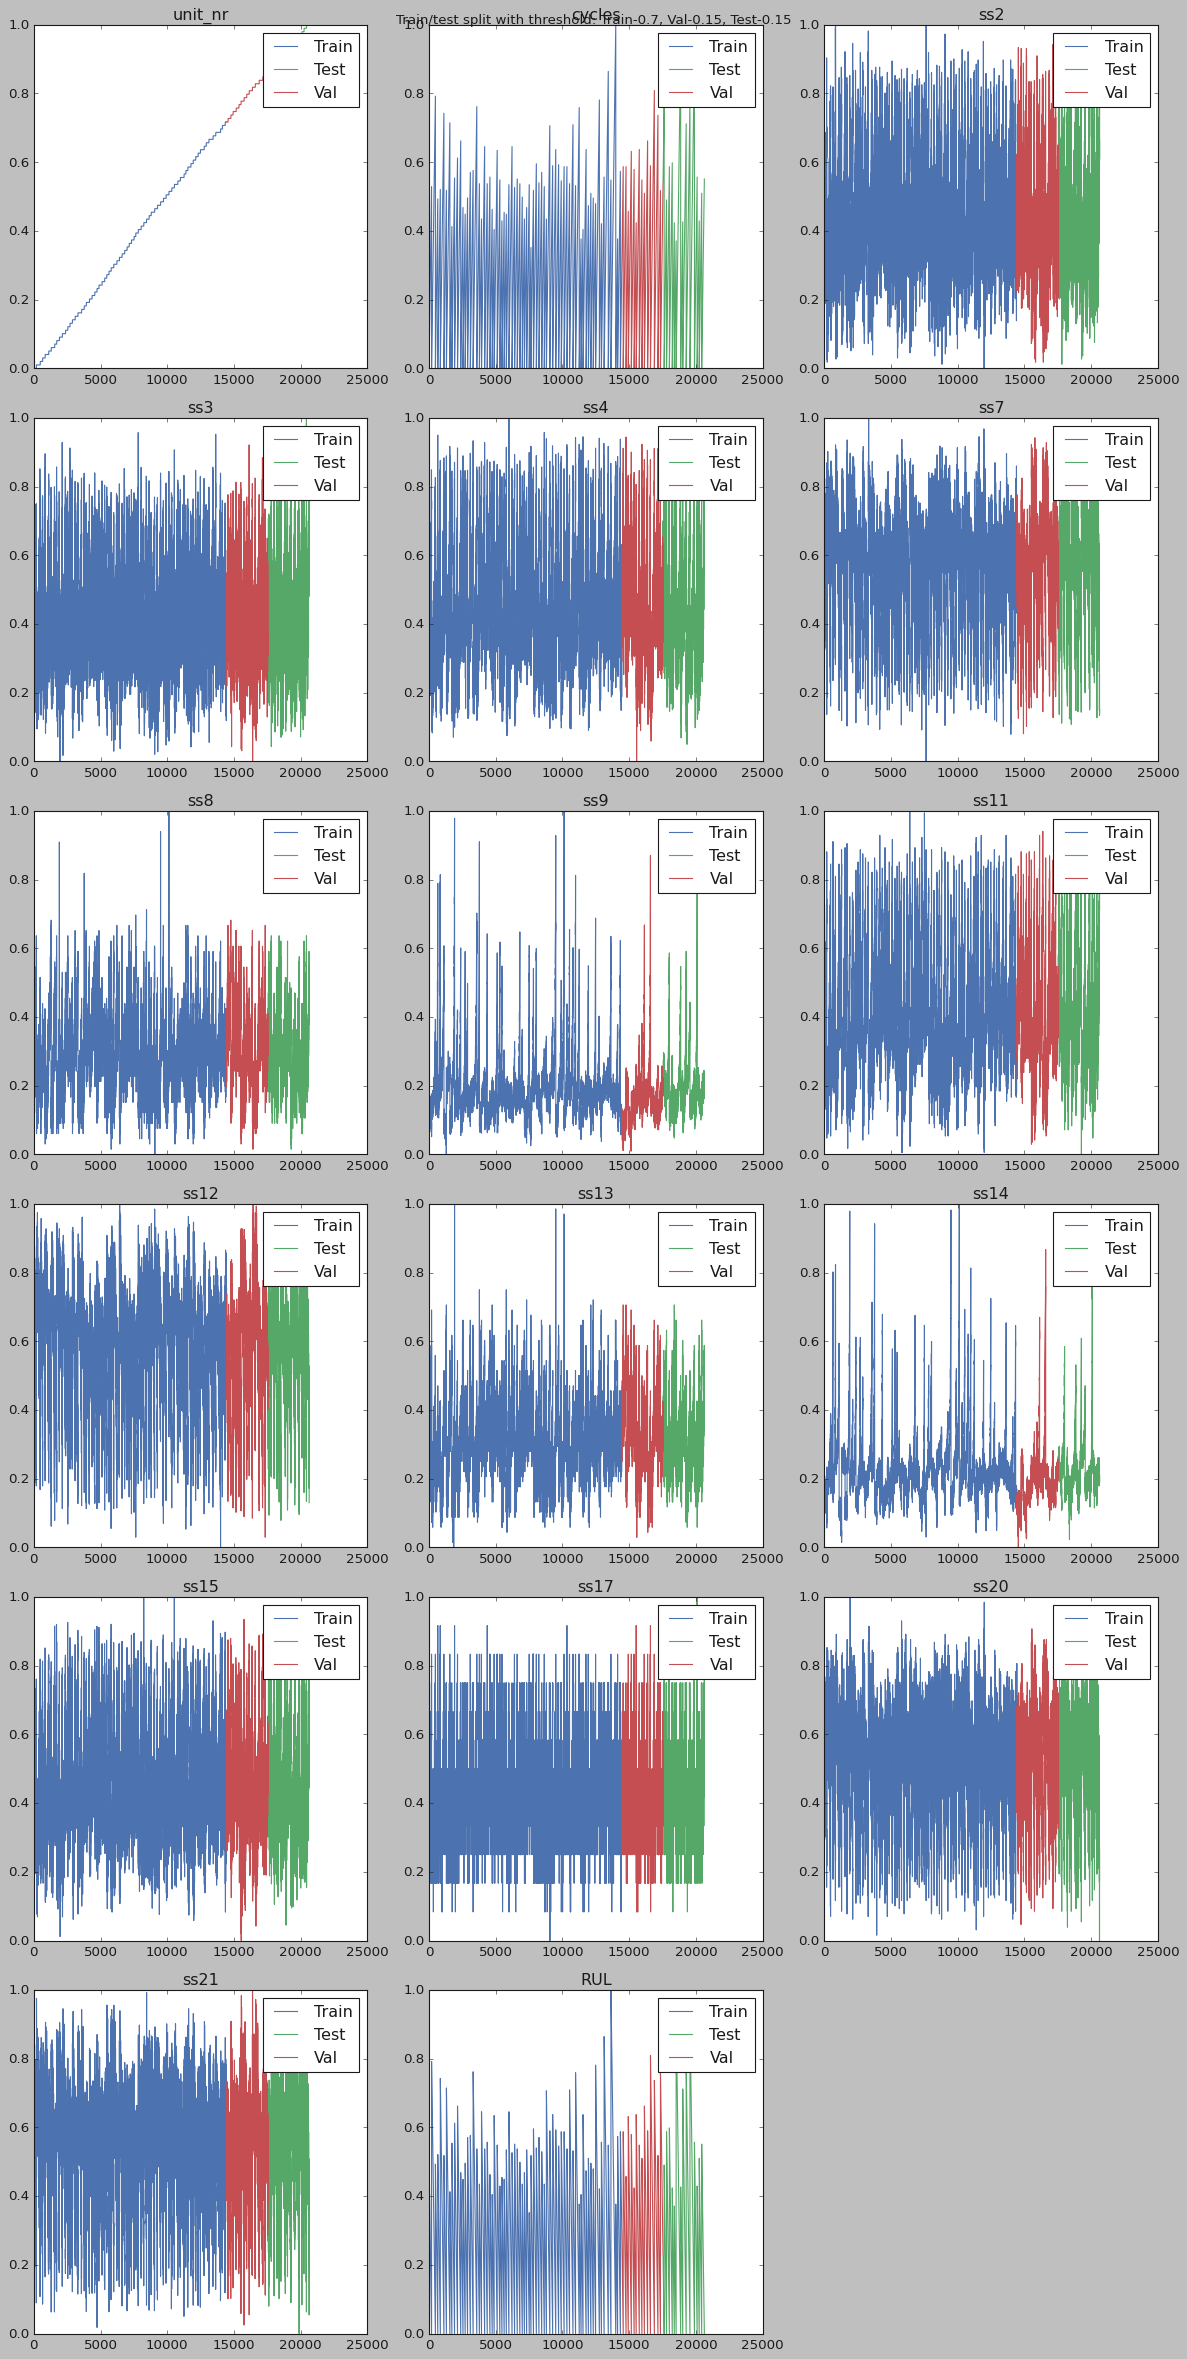

((14441, 17), (3095, 17), (3095, 17))

In [538]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def train_test_val_split(df, train_size=0.7, val_size=0.15, test_size=0.15):
    train_val, test = train_test_split(df, test_size=test_size, shuffle=False)
    train, val = train_test_split(train_val, test_size=val_size / (train_size + val_size), shuffle=False)

    num_cols = df.shape[1]  # Number of columns in the dataset

    if num_cols == 1:  # Univariate data
        plt.figure(figsize=(10, 5))
        plt.plot(train, label='Train')
        plt.plot(test, label='Test')
        plt.plot(val, label='Val')
        plt.title('Train/test split with threshold: Train-{}, Val-{}, Test-{}'.format(train_size, val_size, test_size))
        plt.legend()
        plt.show()
    else:  # Multivariate data
        num_rows = (num_cols + 2) // 3  # Calculate the number of subplot rows
        fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
        fig.suptitle('Train/test split with threshold: Train-{}, Val-{}, Test-{}'.format(train_size, val_size, test_size))

        for i, columns in enumerate(df.columns):
            row = i // 3
            col = i % 3
            axes[row, col].plot(train.iloc[:, i], label='Train')
            axes[row, col].plot(test.iloc[:, i], label='Test')
            axes[row, col].plot(val.iloc[:, i], label='Val')
            axes[row, col].set_title(df.columns[i])
            axes[row, col].legend()

        # Remove unused subplots
        if num_cols % 3 != 0:
            for j in range(num_cols % 3, 3):
                fig.delaxes(axes[num_rows - 1, j])

        plt.tight_layout()
        plt.show()

    return train, val, test

train, val, test = train_test_val_split(df_nor)
train.shape,val.shape,test.shape

Split all the dataset into X,y

In [539]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

X_val = val.iloc[:,:-1]
y_val = val.iloc[:,-1]

X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((14441, 16), (14441,), (3095, 16), (3095,), (3095, 16), (3095,))

In [540]:
y_train

0        0.529086
1        0.526316
2        0.523546
3        0.520776
4        0.518006
           ...   
14436    0.315789
14437    0.313019
14438    0.310249
14439    0.307479
14440    0.304709
Name: RUL, Length: 14441, dtype: float64

# MODELS

## Performance matrix and funtions

### Create score dataframe

In [541]:
### Create the data frame for the evaluation matrix
# Same matrix can use for many regression model
df_eva = pd.DataFrame(columns=[
    'Model_name','E_mean','E_min','E_max', 'MSE', 'MAE','RMSE','R2_score','Run_time(s)'
])
df_eva

Empty DataFrame
Columns: [Model_name, E_mean, E_min, E_max, MSE, MAE, RMSE, R2_score, Run_time(s)]
Index: []

In [542]:
df_err = pd.DataFrame(columns=[
    'Model_name','Error'
])
df_err

Empty DataFrame
Columns: [Model_name, Error]
Index: []

### Test set evaluate
Class 'test_evaluate' for evaluating the dataset, and save the score on the dataframe

Define as: `test_evaluate(model,X_test,y_test)`

Use attribute:
* `random_plot(range)` : given plot of random range value or all (if `range` =0)
* `record_test(df,_eva,model_str_name)`:

In [543]:
### For Test set
import time
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Class get predction on test set and save on a dataframe 'result' for further evaluation
class test_evaluate():
  def __init__(self,model,X_test,y_test):
    self.model = model
    self.X_test = X_test
    self.y_test = y_test
    # Get reuslt: df col: {'Predictions', 'Actuals', 'mae', 'mse'}
    self.result,self.run_time = self.get_prediction()
    print(self.result)

  ### Get prediction of the dataset and return the dataset
  def get_prediction(self):
    # Run prediction and get run time in second
    start_time = time.time()
    predict = self.model.predict(self.X_test).flatten()
    end_time = time.time()
    run_time = end_time - start_time
    # Actual value
    actual = tf.squeeze(self.y_test)
    # save in df
    result = pd.DataFrame(data={'Predictions': np.array(predict)})
    result['Actuals'] = pd.Series(actual)
    # < 0 = early; > 0 = late
    result['Error'] = (predict-actual)

    print(np.mean(result['Error']))
    return result, run_time

  def record_test(self,df_eva,df_err,model_name):
    # get values
    predictions = tf.convert_to_tensor(self.result['Predictions'])
    actual_values = tf.convert_to_tensor(self.result['Actuals'])

    # Calculate MAE and MSE
    mse = tf.keras.losses.MSE(actual_values, predictions)
    mae = tf.keras.losses.MAE(actual_values, predictions)


    ##     'Model_name','E_mean','E_min','E_max', 'MSE', 'MAE','RMSE','R2_score','Run_time(s)'
    add_on = {
        'Model_name':[model_name],
        'E_mean':[np.mean(self.result['Error'])]  ,
        'E_min':[min(self.result['Error'])] ,
        'E_max':[max(self.result['Error'])] ,
        'MSE':[np.mean(mse.numpy())]  ,
        'MAE':[np.mean(mae.numpy())]  ,
        'RMSE':[np.sqrt(np.mean(mse.numpy()))] ,
        'R2_score': [r2_score(actual_values,predictions)],
        'Run_time(s)':[self.run_time]}

    if model_name in df_eva['Model_name'].values:
        # Remove the previous row for the same model
        df_eva = df_eva[df_eva['Model_name'] != model_name]
    # Add to evaluation of the model

    df_add = pd.DataFrame(add_on)
    df_eva_new = pd.concat([df_eva,df_add], ignore_index = True)
    df_eva.reset_index()

    # Add to the main error df
    if model_name in df_err['Model_name'].values:
      # Remove the previous row for the same model
      df_err = df_err[df_err['Model_name'] != model_name]
    ###    'Model_name','Error'
    add_err_on = {'Model_name': model_name,
                  'Error': pd.Series(self.result['Error'])}
    df_add_err = pd.DataFrame(add_err_on)
    print(df_add_err)
    df_err_new = pd.concat([df_err,df_add_err], ignore_index = True)
    df_err_new.reset_index()


    return df_eva_new,df_err_new



  ### Plot out random range of the set or plot all value (if given 0) ###
  def random_plot(self,range):
    if range != 0:
      if range > (len(self.result)):
        print('ERROR: The given range > the size of the set')
        return None

      # Random
      start_index = random.randint(0, len(self.result) - range)
      end_index = start_index + range

      plt.plot(self.result['Predictions'][start_index:end_index], label='predict')
      plt.plot(self.result['Actuals'][start_index:end_index], label='actual')
      plt.xlabel('Time')
      plt.ylabel('Value')
    else:
      # All
      plt.plot(self.result['Predictions'], label='predict')
      plt.plot(self.result['Actuals'], label='actual')
      plt.xlabel('Time')
      plt.ylabel('Value')

    plt.legend()

### Training evaluate
Class 'training_error' show error during train for trainset and validate set.

Use function:
* `random_plot(range)`:given plot of random range value or all (if `range` =0)
* `training_error()` : Return the plot of error during training process

In [544]:
import random
# Plot error in training process
# Arg:
#   history: model history when train
#   model: model key
#   X_train, y_train, X_val, y_val : Datasets

class training_error:
  def __init__(self, history, model, X_train, y_train, X_val, y_val):
    self.history = history
    self.X_train = X_train
    self.y_train = y_train
    self.X_val = X_val
    self.y_val = y_val
    self.model = model

    self.result_train = self.get_prediction(self.model,self.X_train,self.y_train)
    self.result_val = self.get_prediction(self.model,self.X_val,self.y_val)

  ### Plot error of train and val set in epochs
  def training_error(self):
    # Plot error of Training and val
    train_loss = self.history.history['loss']
    val_loss = self.history.history['val_loss']

    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Error Process During Training')
    plt.legend()
    plt.show()

  ### Get prediction and return the dataframe contain: 'Prediction' and 'Actual'
  def get_prediction(self,model,X,y):
    predict = self.model.predict(X).flatten()
    actual = tf.squeeze(y)

    results = pd.DataFrame(data={'Predictions': np.array(predict)})
    results['Actuals'] = pd.Series(actual)
    return results

  ### Plot for train and val set
  ### The functions have 2 mode!
    # range == 0 : the plot will show all the value in the train and val set
    # range != 0: the plot will show the random of the given range values, if the given range > the whole dataset is will error
      # note that the random in both train and val is different !!
  def random_plot(self,range):
    fig, ax = plt.subplots(1,2,figsize = (15,5))

    if range != 0:
      if range > (len(self.result_train)):
        print('ERROR: The given range > the size of the set')
        return None

      # Random part for train
      start_index = random.randint(0, len(self.result_train) - range)
      end_index = start_index + range

      ax[0].plot(self.result_train['Predictions'][start_index:end_index], label='predict')
      ax[0].plot(self.result_train['Actuals'][start_index:end_index], label='actual')
      ax[0].set_xlabel('Time')
      ax[0].set_ylabel('Value')
      # Random part for val
      start_index = random.randint(0, len(self.result_val) - range)
      end_index = start_index + range

      ax[1].plot(self.result_val['Predictions'][start_index:end_index], label='predict')
      ax[1].plot(self.result_val['Actuals'][start_index:end_index], label='actual')
      ax[1].set_ylabel('Value')
      ax[1].set_xlabel('Time')
      plt.legend()
    else:
      # All for train
      ax[0].plot(self.result_train['Predictions'], label='predict')
      ax[0].plot(self.result_train['Actuals'], label='actual')
      ax[0].set_xlabel('Time')
      ax[0].set_ylabel('Value')
      # All for val
      ax[1].plot(self.result_val['Predictions'], label='predict')
      ax[1].plot(self.result_val['Actuals'], label='actual')
      ax[1].set_ylabel('Value')
      ax[1].set_xlabel('Time')
      plt.legend()

In [545]:
import matplotlib.pyplot as plt
def plot_data_predict(data,prediction):
  fig,ax = plt.subplots(figsize=(10,8))
  ax.plot(data, label='Data', color='blue')
  ax.plot(prediction, label='Predict',color='red')
  ax.set_ylabel('Value')
  ax.set_xlabel('TIME')
  ax.set_title('DATA - PREDICTION')
  plt.legend()

### Save model funtions
The model save will have the time save format: `%Y_%m_%d_MODELNAME.h5`

Arg:
* `Project tag`
* `MODEL_NAME`

return the paths to the save model:
the varible should be define as: `SAVE_{MODEL_NAME}`

In [546]:
import time
def mine_save_model(project_tag,MODEL_NAME):
  # Save folder
  current_time = time.strftime("%Y_%m_%d")
  model_time_name = '%s_%s.h5'%(current_time,MODEL_NAME)
  print('-Model will save as: {}'.format(model_time_name))
  save_path = os.path.join(project_tag['SAVE_MODEL'],MODEL_NAME,model_time_name)
  print('-Path to model: {}'.format(save_path))
  return save_path

### Load model funtions
Funtions required:
* `project_tag`: a list contain project save paths and folder. Define in *FOLDER PATHS* section ex: 'CMAPSS'
* `model_name`: in str. ex 'LSTM'

return loaded model

In [547]:
import glob
from natsort import natsorted
from tensorflow.keras.models import load_model

def mine_load_model(project_tag,MODEL_NAME):
  # CHOOSE MODEL TO LOAD
  model_list = natsorted(glob.glob(os.path.join(project_tag['SAVE_MODEL'],MODEL_NAME,'*')),reverse=True)
  if len(model_list) !=0:
    # print all model name
    for model in model_list:
      print('number ' + str(model_list.index(model)) + ': ' + os.path.basename(model))
    # choose the neweset model -> [0]
    choosed_model =  model_list[0]
    print('-------> Model path choose: {}'.format(choosed_model))
    # LOADING
    try:
      loaded_model = load_model(choosed_model)
      return loaded_model
    except:
      print('FAIL TO LOAD!!!!')
      return None
  else:
    print('NO MODEL TO LOAD!!')
    return None

## Linear regresion

### Define model
Contains:
* Define model
* Create save path for the model
* Create checkpoint and early stopping for the model
* Combine the model for training

In [548]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from sklearn.model_selection import cross_val_score
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [549]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()

### Train
Contains:
* Fit model
* Save model
* Get train-val error during train
* Plot results of the model on the train and val set (random and all)

In [550]:
history_LR = model_LR.fit(X_train, y_train)

In [551]:
scoreLR = cross_val_score(model_LR,X_train,y_train,cv=5)
scoreLR

array([0.71351682, 0.7000093 , 0.7759923 , 0.70542592, 0.32446916])

In [552]:
te = training_error(history_LR,model_LR,X_train, y_train,X_val, y_val)

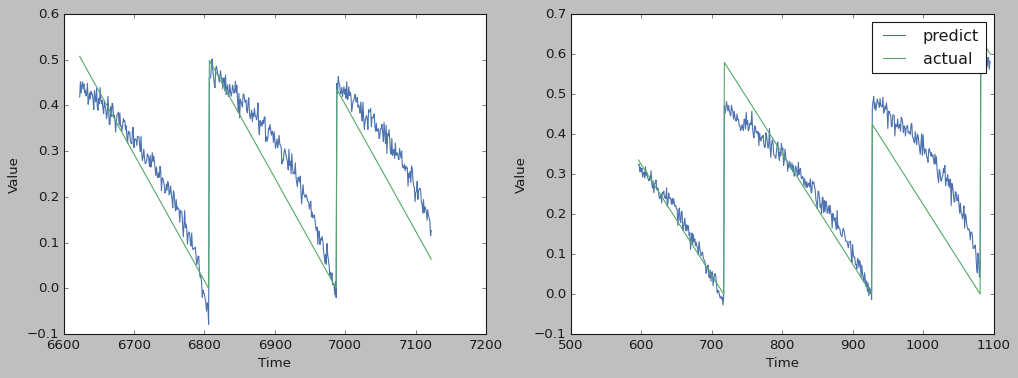

In [553]:
te.random_plot(500)

### Evaluate

In [554]:
teLR = test_evaluate(model_LR,X_test,y_test)

0.0068619600174519655
      Predictions   Actuals     Error
0        0.182614  0.224377 -0.041763
1        0.163473  0.221607 -0.058134
2        0.186664  0.218837 -0.032172
3        0.164868  0.216066 -0.051199
4        0.188156  0.213296 -0.025141
...           ...       ...       ...
3090     0.046535  0.011080  0.035455
3091     0.043384  0.008310  0.035074
3092     0.021324  0.005540  0.015784
3093     0.012678  0.002770  0.009908
3094     0.012554  0.000000  0.012554

[3095 rows x 3 columns]


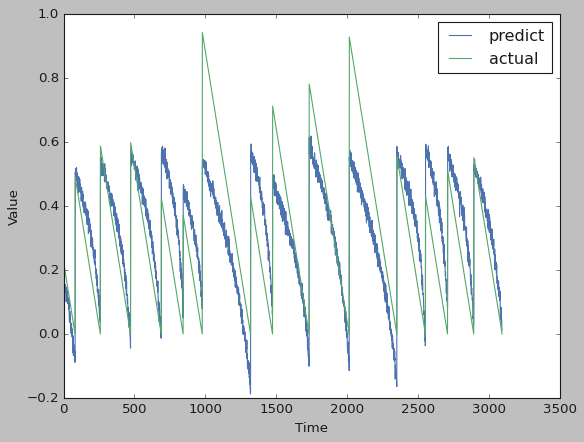

In [555]:
teLR.random_plot(0)

In [556]:
df_eva,df_err = teLR.record_test(df_eva,df_err,'LR')
df_err

     Model_name     Error
0            LR -0.041763
1            LR -0.058134
2            LR -0.032172
3            LR -0.051199
4            LR -0.025141
...         ...       ...
3090         LR  0.035455
3091         LR  0.035074
3092         LR  0.015784
3093         LR  0.009908
3094         LR  0.012554

[3095 rows x 2 columns]


Model_name     Error
0            LR -0.041763
1            LR -0.058134
2            LR -0.032172
3            LR -0.051199
4            LR -0.025141
...         ...       ...
3090         LR  0.035455
3091         LR  0.035074
3092         LR  0.015784
3093         LR  0.009908
3094         LR  0.012554

[3095 rows x 2 columns]

In [557]:
# # make predictions on the testing data
# y_pred = model_LR.predict(X_test)

In [558]:
# from sklearn.metrics import  mean_squared_error,r2_score, mean_absolute_percentage_error
# # evaluate the performance of the model
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# mape = mean_absolute_percentage_error(y_test, y_pred)
# print(f"Mean squared error: {mse}")
# print(f"Root mean squared error: {rmse}")
# print(f"R-squared score: {r2}")
# print(f"mean_absolute_percentage_error: {mape}")

## Random forrest

### Define model
Contains:
* Define model
* Create save path for the model
* Create checkpoint and early stopping for the model
* Combine the model for training

In [559]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor()

### Train
Contains:
* Fit model
* Save model
* Get train-val error during train
* Plot results of the model on the train and val set (random and all)

In [560]:
history_RF = model_RF.fit(X_train, y_train)

In [561]:
te = training_error(history_RF,model_RF,X_train, y_train,X_val, y_val)

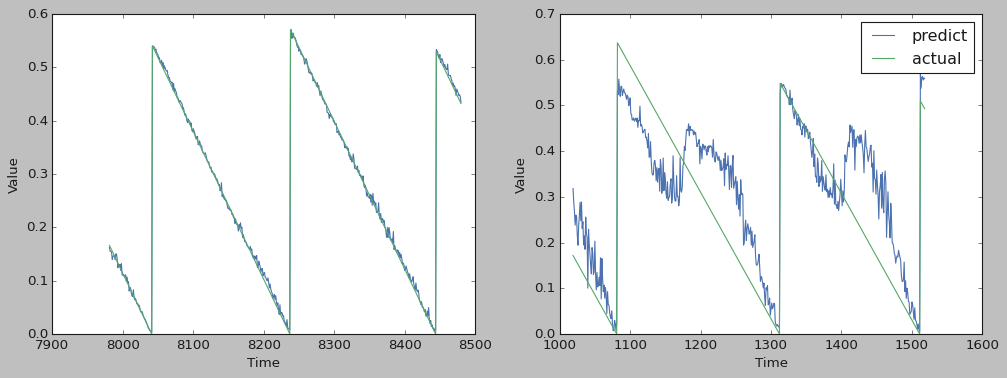

In [562]:
te.random_plot(500)

### Evaluate

In [563]:
teRF = test_evaluate(model_RF,X_test,y_test)

-0.012284607019632226
      Predictions   Actuals     Error
0        0.203435  0.224377 -0.020942
1        0.235651  0.221607  0.014044
2        0.227562  0.218837  0.008726
3        0.195152  0.216066 -0.020914
4        0.242438  0.213296  0.029141
...           ...       ...       ...
3090     0.016537  0.011080  0.005457
3091     0.011247  0.008310  0.002936
3092     0.015623  0.005540  0.010083
3093     0.011911  0.002770  0.009141
3094     0.005956  0.000000  0.005956

[3095 rows x 3 columns]


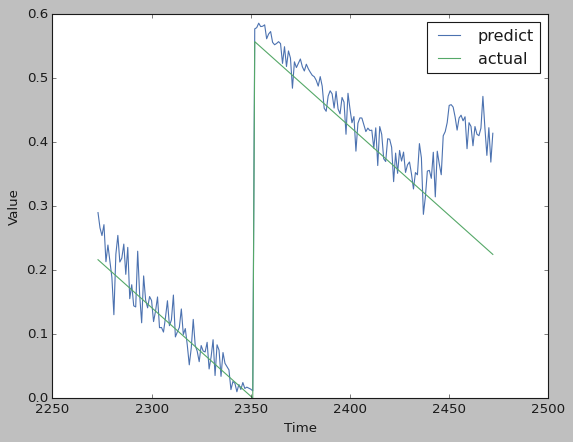

In [564]:
teRF.random_plot(200)

In [565]:
df_eva,df_err = teRF.record_test(df_eva,df_err,'RF')
df_eva

     Model_name     Error
0            RF -0.020942
1            RF  0.014044
2            RF  0.008726
3            RF -0.020914
4            RF  0.029141
...         ...       ...
3090         RF  0.005457
3091         RF  0.002936
3092         RF  0.010083
3093         RF  0.009141
3094         RF  0.005956

[3095 rows x 2 columns]


Model_name    E_mean     E_min     E_max       MSE       MAE      RMSE  \
0         LR  0.006862 -0.421813  0.258568  0.021620  0.122383  0.147036   
1         RF -0.012285 -0.451053  0.284792  0.019164  0.097479  0.138432   

   R2_score  Run_time(s)  
0  0.539818     0.004870  
1  0.592094     0.049108

## GradientBoosting

### Define model
Contains:
* Define model
* Create save path for the model
* Create checkpoint and early stopping for the model
* Combine the model for training

In [566]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor()

### Train
Contains:
* Fit model
* Save model
* Get train-val error during train
* Plot results of the model on the train and val set (random and all)

In [567]:
history_GBR = model_GBR.fit(X_train, y_train)

In [568]:
te = training_error(history_GBR,model_GBR,X_train, y_train,X_val, y_val)

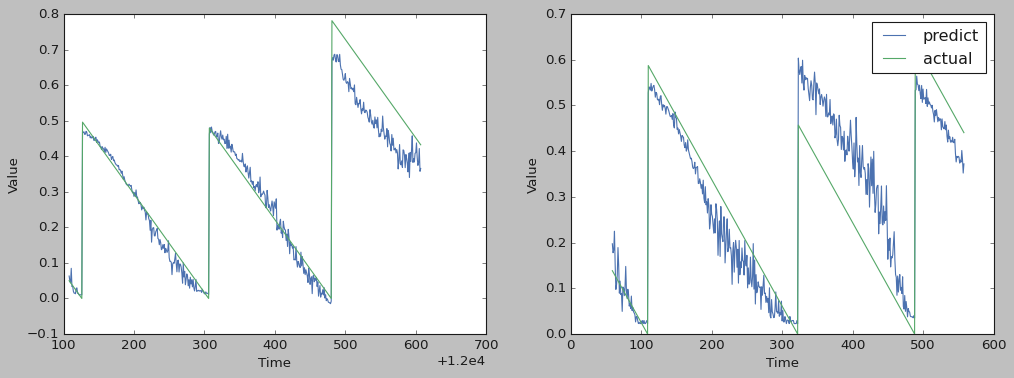

In [569]:
te.random_plot(500)

### Evaluate

In [570]:
teGBR = test_evaluate(model_GBR,X_test,y_test)

0.00439810612732617
      Predictions   Actuals     Error
0        0.158624  0.224377 -0.065752
1        0.149970  0.221607 -0.071636
2        0.158618  0.218837 -0.060218
3        0.142023  0.216066 -0.074043
4        0.245202  0.213296  0.031905
...           ...       ...       ...
3090     0.032503  0.011080  0.021423
3091     0.020729  0.008310  0.012419
3092     0.033709  0.005540  0.028169
3093     0.023883  0.002770  0.021113
3094     0.019412  0.000000  0.019412

[3095 rows x 3 columns]


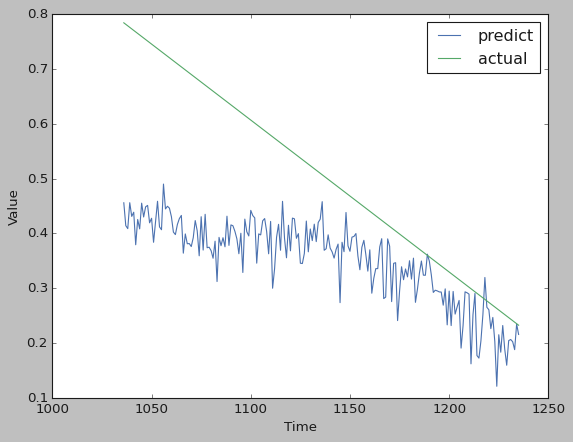

In [571]:
teGBR.random_plot(200)

In [572]:
df_eva,df_err = teGBR.record_test(df_eva,df_err,'GBR')
df_eva

     Model_name     Error
0           GBR -0.065752
1           GBR -0.071636
2           GBR -0.060218
3           GBR -0.074043
4           GBR  0.031905
...         ...       ...
3090        GBR  0.021423
3091        GBR  0.012419
3092        GBR  0.028169
3093        GBR  0.021113
3094        GBR  0.019412

[3095 rows x 2 columns]


Model_name    E_mean     E_min     E_max       MSE       MAE      RMSE  \
0         LR  0.006862 -0.421813  0.258568  0.021620  0.122383  0.147036   
1         RF -0.012285 -0.451053  0.284792  0.019164  0.097479  0.138432   
2        GBR  0.004398 -0.421881  0.279943  0.018266  0.102559  0.135150   

   R2_score  Run_time(s)  
0  0.539818     0.004870  
1  0.592094     0.049108  
2  0.611207     0.007721

## Dense

### Define model
Contains:
* Define model
* Create save path for the model
* Create checkpoint and early stopping for the model
* Combine the model for training

In [573]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping

from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [574]:
model_dense = Sequential()
model_dense.add(Dense(64, activation='relu', input_shape=(len(X_train.columns),)))
model_dense.add(Dense(64))
model_dense.add(Dropout(rate=0.3))
model_dense.add(Dense(1))

model_dense.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                1088      
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5313 (20.75 KB)
Trainable params: 5313 (20.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [575]:
MODEL_NAME = 'Dense'
SAVE_DENSE = mine_save_model(project_tag = CMAPSS_IN, MODEL_NAME = MODEL_NAME)

-Model will save as: 2023_09_10_Dense.h5
-Path to model: /content/drive/MyDrive/ColabProjects/PdM/model/CMAPSS_instance/Dense/2023_09_10_Dense.h5


In [576]:
# Check point
cp = ModelCheckpoint(SAVE_DENSE, save_best_only=True)
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Compile model
model_dense.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

### Train
Contains:
* Fit model
* Save model
* Get train-val error during train
* Plot results of the model on the train and val set (random and all)

In [577]:
history_dense = model_dense.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, callbacks=[cp, early_stopping])

Epoch 1/1000
452/452 [==============================] - 2s 3ms/step - loss: 0.2287 - root_mean_squared_error: 0.4782 - val_loss: 0.1773 - val_root_mean_squared_error: 0.4210
Epoch 2/1000
 84/452 [====>.........................] - ETA: 0s - loss: 0.1163 - root_mean_squared_error: 0.3410

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


452/452 [==============================] - 1s 2ms/step - loss: 0.0824 - root_mean_squared_error: 0.2871 - val_loss: 0.0680 - val_root_mean_squared_error: 0.2609
Epoch 3/1000
452/452 [==============================] - 1s 2ms/step - loss: 0.0468 - root_mean_squared_error: 0.2164 - val_loss: 0.0399 - val_root_mean_squared_error: 0.1999
Epoch 4/1000
452/452 [==============================] - 1s 2ms/step - loss: 0.0381 - root_mean_squared_error: 0.1952 - val_loss: 0.0307 - val_root_mean_squared_error: 0.1751
Epoch 5/1000
452/452 [==============================] - 1s 2ms/step - loss: 0.0333 - root_mean_squared_error: 0.1826 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1584
Epoch 6/1000
452/452 [==============================] - 1s 2ms/step - loss: 0.0304 - root_mean_squared_error: 0.1743 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1462
Epoch 7/1000
452/452 [==============================] - 1s 2ms/step - loss: 0.0275 - root_mean_squared_error: 0.1659 - val_loss: 0.0185 - val_r

In [578]:
model_dense.save(SAVE_DENSE)

In [579]:
te = training_error(history_dense,model_dense,X_train,y_train,X_val,y_val)

97/97 [==============================] - 0s 1ms/step


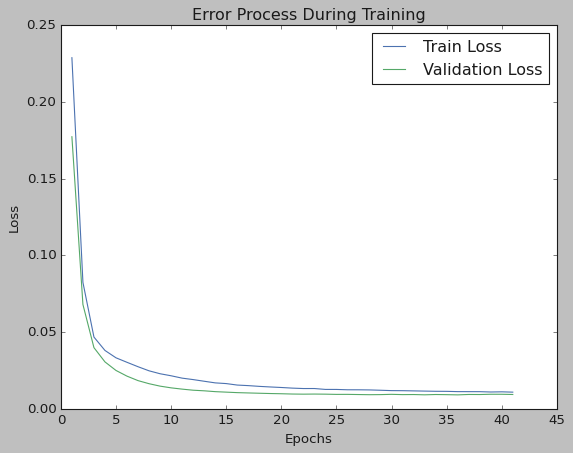

In [580]:
te.training_error()

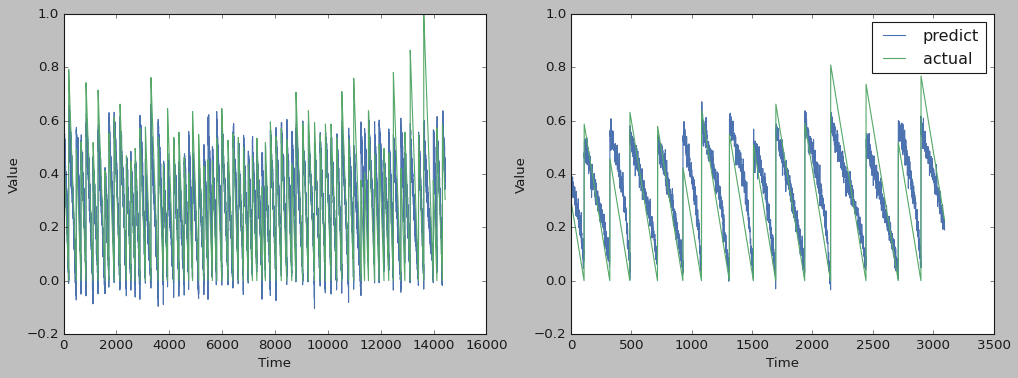

In [581]:
te.random_plot(0)

### Load

In [582]:
model_dense = mine_load_model(project_tag = CMAPSS_IN,MODEL_NAME = 'Dense')

number 0: 2023_09_10_Dense.h5
number 1: 2023_09_08_Dense.h5
number 2: 2023_06_20_Dense.h5
number 3: 2023_06_07_Dense.h5
number 4: 2023_06_06_Dense.h5
number 5: 2023_06_05_Dense.h5
number 6: 2023_06_02_Dense.h5
number 7: 2023_06_01_Dense.h5
-------> Model path choose: /content/drive/MyDrive/ColabProjects/PdM/model/CMAPSS_instance/Dense/2023_09_10_Dense.h5


### Evaluate
Contains:
* Run predict on test set
* Record errors on a dataframe or further compair of difference models

In [583]:
teDense = test_evaluate(model_dense,X_test,y_test)

97/97 [==============================] - 0s 2ms/step
0.04744807051611823
      Predictions   Actuals     Error
0        0.180619  0.224377 -0.043757
1        0.196033  0.221607 -0.025574
2        0.196540  0.218837 -0.022296
3        0.171014  0.216066 -0.045053
4        0.228661  0.213296  0.015365
...           ...       ...       ...
3090     0.059867  0.011080  0.048787
3091     0.107490  0.008310  0.099180
3092     0.050375  0.005540  0.044835
3093     0.071784  0.002770  0.069014
3094     0.062787  0.000000  0.062787

[3095 rows x 3 columns]


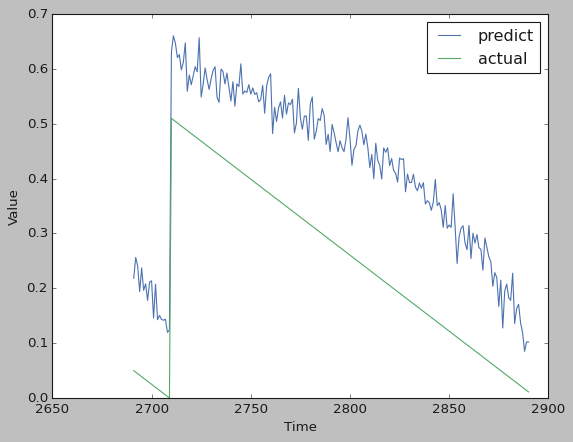

In [584]:
teDense.random_plot(200)

In [585]:
df_eva,df_err = teDense.record_test(df_eva,df_err,'Dense')
df_eva

     Model_name     Error
0         Dense -0.043757
1         Dense -0.025574
2         Dense -0.022296
3         Dense -0.045053
4         Dense  0.015365
...         ...       ...
3090      Dense  0.048787
3091      Dense  0.099180
3092      Dense  0.044835
3093      Dense  0.069014
3094      Dense  0.062787

[3095 rows x 2 columns]


Model_name    E_mean     E_min     E_max       MSE       MAE      RMSE  \
0         LR  0.006862 -0.421813  0.258568  0.021620  0.122383  0.147036   
1         RF -0.012285 -0.451053  0.284792  0.019164  0.097479  0.138432   
2        GBR  0.004398 -0.421881  0.279943  0.018266  0.102559  0.135150   
3      Dense  0.047448 -0.370982  0.319593  0.022798  0.127349  0.150991   

   R2_score  Run_time(s)  
0  0.539818     0.004870  
1  0.592094     0.049108  
2  0.611207     0.007721  
3  0.514725     0.405216

## LSTM

### Define model

In [586]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping

from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [587]:
model_LSTM = Sequential()

model_LSTM.add(InputLayer((len(X_train.columns),1)))
model_LSTM.add(LSTM(units = 64,return_sequences=False))
model_LSTM.add(Dense(10, 'relu'))
model_LSTM.add(Dropout(rate=0.3))
model_LSTM.add(Flatten())
model_LSTM.add(Dense(1))

model_LSTM.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 dense_33 (Dense)            (None, 10)                650       
                                                                 
 dropout_13 (Dropout)        (None, 10)                0         
                                                                 
 flatten_6 (Flatten)         (None, 10)                0         
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 17557 (68.58 KB)
Trainable params: 17557 (68.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [588]:
MODEL_NAME = 'LSTM'
# Save folder
import time
current_time = time.strftime("%Y_%m_%d")
model_time_name = '%s_%s.h5'%(current_time,MODEL_NAME)
print(model_time_name)
SAVE_LSTM = os.path.join(CMAPSS_IN['SAVE_MODEL'],MODEL_NAME,model_time_name)
print(SAVE_LSTM)

2023_09_10_LSTM.h5
/content/drive/MyDrive/ColabProjects/PdM/model/CMAPSS_instance/LSTM/2023_09_10_LSTM.h5


In [589]:
# Check point
cp = ModelCheckpoint(SAVE_LSTM, save_best_only=True)
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# Complile
model_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

### Train

In [590]:
history_LSTM = model_LSTM.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp, early_stopping])

Epoch 1/100
452/452 [==============================] - 10s 17ms/step - loss: 0.0603 - root_mean_squared_error: 0.2455 - val_loss: 0.0406 - val_root_mean_squared_error: 0.2015
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


452/452 [==============================] - 5s 10ms/step - loss: 0.0402 - root_mean_squared_error: 0.2006 - val_loss: 0.0341 - val_root_mean_squared_error: 0.1846
Epoch 3/100
452/452 [==============================] - 5s 12ms/step - loss: 0.0306 - root_mean_squared_error: 0.1751 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1504
Epoch 4/100
452/452 [==============================] - 6s 13ms/step - loss: 0.0241 - root_mean_squared_error: 0.1551 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1622
Epoch 5/100
452/452 [==============================] - 5s 10ms/step - loss: 0.0221 - root_mean_squared_error: 0.1487 - val_loss: 0.0286 - val_root_mean_squared_error: 0.1692
Epoch 6/100
452/452 [==============================] - 6s 14ms/step - loss: 0.0205 - root_mean_squared_error: 0.1431 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1487
Epoch 7/100
452/452 [==============================] - 5s 11ms/step - loss: 0.0198 - root_mean_squared_error: 0.1408 - val_loss: 0.0207 - val_

In [591]:
model_LSTM.save(SAVE_LSTM)

In [592]:
te = training_error(history_LSTM,model_LSTM,X_train,y_train,X_val,y_val)

97/97 [==============================] - 0s 4ms/step


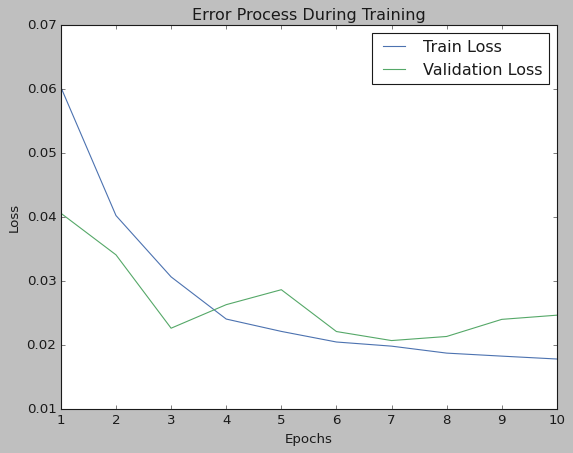

In [593]:
te.training_error()

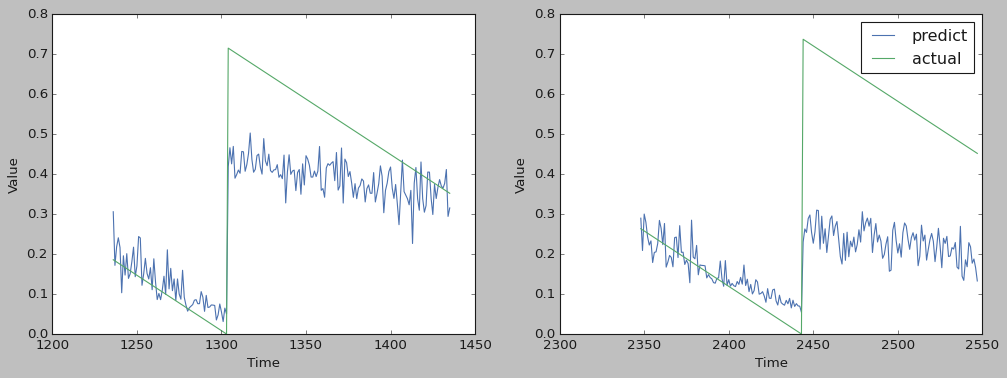

In [594]:
te.random_plot(200)

### Load

In [595]:
model_LSTM = mine_load_model(project_tag = CMAPSS_IN,MODEL_NAME = 'LSTM')

number 0: 2023_09_10_LSTM.h5
number 1: 2023_09_08_LSTM.h5
number 2: 2023_06_20_LSTM.h5
number 3: 2023_06_07_LSTM.h5
number 4: 2023_06_06_LSTM.h5
number 5: 2023_06_05_LSTM.h5
number 6: 2023_06_02_LSTM.h5
number 7: 2023_06_01_LSTM.h5
-------> Model path choose: /content/drive/MyDrive/ColabProjects/PdM/model/CMAPSS_instance/LSTM/2023_09_10_LSTM.h5


### Evaluate

In [596]:
teLSTM = test_evaluate(model_LSTM,X_test,y_test)

97/97 [==============================] - 1s 5ms/step
-0.0934750314112868
      Predictions   Actuals     Error
0        0.148758  0.224377 -0.075619
1        0.161453  0.221607 -0.060154
2        0.192109  0.218837 -0.026727
3        0.098524  0.216066 -0.117542
4        0.145253  0.213296 -0.068043
...           ...       ...       ...
3090     0.071217  0.011080  0.060137
3091     0.082248  0.008310  0.073938
3092     0.046358  0.005540  0.040817
3093     0.053910  0.002770  0.051139
3094     0.068475  0.000000  0.068475

[3095 rows x 3 columns]


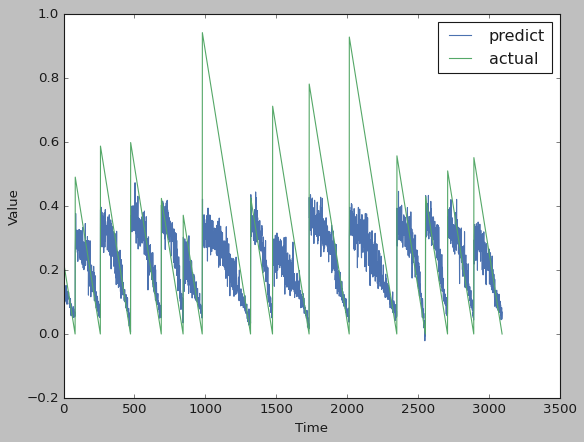

In [597]:
teLSTM.random_plot(0)

In [598]:
df_eva,df_err = teLSTM.record_test(df_eva,df_err,'LSTM')
df_eva

     Model_name     Error
0          LSTM -0.075619
1          LSTM -0.060154
2          LSTM -0.026727
3          LSTM -0.117542
4          LSTM -0.068043
...         ...       ...
3090       LSTM  0.060137
3091       LSTM  0.073938
3092       LSTM  0.040817
3093       LSTM  0.051139
3094       LSTM  0.068475

[3095 rows x 2 columns]


Model_name    E_mean     E_min     E_max       MSE       MAE      RMSE  \
0         LR  0.006862 -0.421813  0.258568  0.021620  0.122383  0.147036   
1         RF -0.012285 -0.451053  0.284792  0.019164  0.097479  0.138432   
2        GBR  0.004398 -0.421881  0.279943  0.018266  0.102559  0.135150   
3      Dense  0.047448 -0.370982  0.319593  0.022798  0.127349  0.150991   
4       LSTM -0.093475 -0.665689  0.176842  0.033370  0.124907  0.182676   

   R2_score  Run_time(s)  
0  0.539818     0.004870  
1  0.592094     0.049108  
2  0.611207     0.007721  
3  0.514725     0.405216  
4  0.289693     1.296967

## New model

### Define model

### Train

### Load

### Evaluate

# Conclusion review on models

Contains:
* All model errors compair
* Errors change from start to end of each model, cycles

In [611]:
df_err['Model_name'].unique().tolist()

['LR', 'RF', 'GBR', 'Dense', 'LSTM']

LR


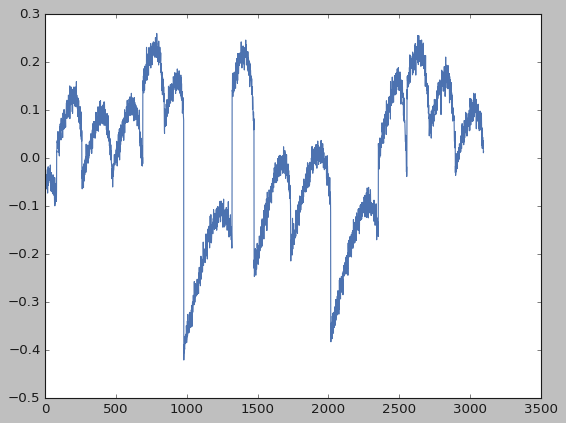

RF


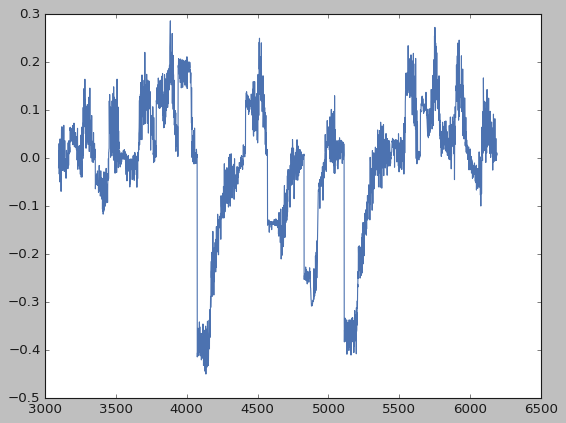

GBR


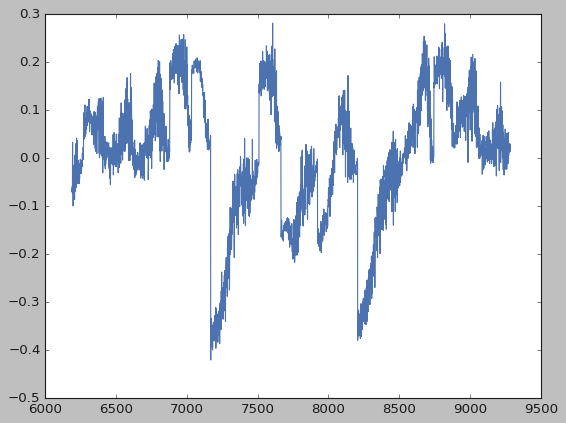

Dense


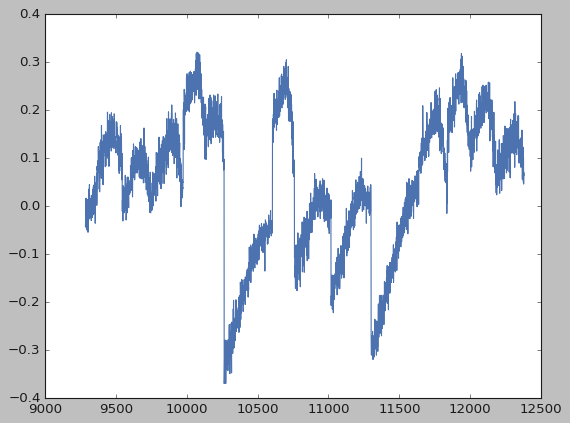

LSTM


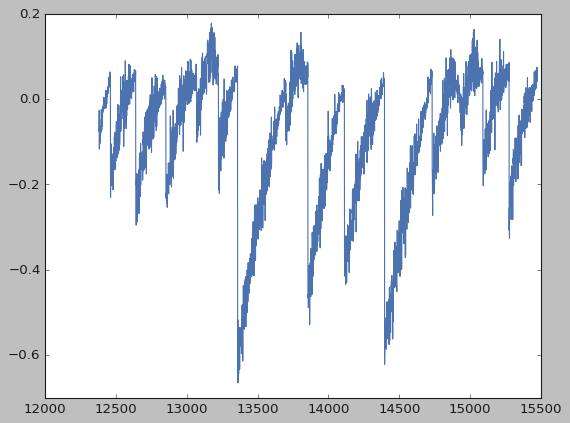

In [614]:
for model in df_err['Model_name'].unique().tolist():
  print(model)
  df_err[df_err['Model_name'] == model]['Error'].plot()
  plt.show()

In [615]:
df_eva

Model_name    E_mean     E_min     E_max       MSE       MAE      RMSE  \
0         LR  0.006862 -0.421813  0.258568  0.021620  0.122383  0.147036   
1         RF -0.012285 -0.451053  0.284792  0.019164  0.097479  0.138432   
2        GBR  0.004398 -0.421881  0.279943  0.018266  0.102559  0.135150   
3      Dense  0.047448 -0.370982  0.319593  0.022798  0.127349  0.150991   
4       LSTM -0.093475 -0.665689  0.176842  0.033370  0.124907  0.182676   

   R2_score  Run_time(s)  
0  0.539818     0.004870  
1  0.592094     0.049108  
2  0.611207     0.007721  
3  0.514725     0.405216  
4  0.289693     1.296967